## Analyzing Polular App Categories On Google Play Store 

In this project, our goal is to figure out what type of apps tend to be popular on the Google Play Store. We work for a company that makes free apps and earn money through ads. By understanding which app categories are in high demand, we can help our developers create apps that attract more users and generate more revenue. We'll analyze data from the Google Play Store to identify patterns and prefrences among users. This way, we can make smarter decisions about the kind of apps we develop.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# Read the datasets into pandas Dataframe objects
android_df = pd.read_csv('googleplaystore.csv')

In [4]:
android_df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

In [5]:
android_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
android_df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [7]:
android_df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [8]:
android_df[android_df['Category'] == '1.9']

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

# Clean the Data 

In [9]:
android_df[android_df['Category'] == '1.9'].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [10]:
android_df[['Category' , 'Genres']]

Category                     Genres
0           ART_AND_DESIGN               Art & Design
1           ART_AND_DESIGN  Art & Design;Pretend Play
2           ART_AND_DESIGN               Art & Design
3           ART_AND_DESIGN               Art & Design
4           ART_AND_DESIGN    Art & Design;Creativity
...                    ...                        ...
10836               FAMILY                  Education
10837               FAMILY                  Education
10838              MEDICAL                    Medical
10839  BOOKS_AND_REFERENCE          Books & Reference
10840            LIFESTYLE                  Lifestyle

[10841 rows x 2 columns]

In [11]:
# Now add a string value in category of row 1.9

clean_lst = ['Life Made WI-Fi Touchscreen Photo Frame','LIFESTYLE' ,'1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', 'Lifestyle', 'February 11, 2018',
        '1.0.19', '4.0 and up']
clean_lst

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'Lifestyle',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [12]:
android_df[android_df["Category"] == "1.9"] = clean_lst

In [13]:
android_df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [14]:
android_df['App']

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10841, dtype: object

In [15]:
android_df['App'].value_counts().head(60)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Bowmasters                                            6
Subway Surfers                                        6
Nick                                                  6
Temple Run 2                                          6
Helix Jump                                            6
Sniper 3D Gun Shooter: Free Shooting Games - FPS      6
MLB At Bat                                            5
MeetMe: Chat & Meet New People                  

In [16]:
app_count = android_df['App'].value_counts()
app_count

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

# Removing Duplicate Entries

In [17]:
android_df[android_df["App"] == "Instagram"]

App Category Rating   Reviews                Size        Installs  \
2545  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
2604  Instagram   SOCIAL    4.5  66577446  Varies with device  1,000,000,000+   
2611  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
3909  Instagram   SOCIAL    4.5  66509917  Varies with device  1,000,000,000+   

      Type Price Content Rating  Genres   Last Updated         Current Ver  \
2545  Free     0           Teen  Social  July 31, 2018  Varies with device   
2604  Free     0           Teen  Social  July 31, 2018  Varies with device   
2611  Free     0           Teen  Social  July 31, 2018  Varies with device   
3909  Free     0           Teen  Social  July 31, 2018  Varies with device   

             Android Ver  
2545  Varies with device  
2604  Varies with device  
2611  Varies with device  
3909  Varies with device

In [18]:
'Instagram' in app_count[app_count > 1]

True

In [19]:
'Instagram' in app_count[app_count > 1].index

True

In [20]:
app_count[app_count >1]

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: App, Length: 798, dtype: int64

In [21]:
9660 + 798

10458

In [22]:
9660 - 798

8862

In [23]:
10841 - 798

10043

In [24]:
android_df[android_df.duplicated(subset = ['App'] ,keep = 'first')]

App       Category Rating Reviews  \
229          Quick PDF Scanner + OCR FREE       BUSINESS    4.2   80805   
236                                   Box       BUSINESS    4.2  159872   
239                    Google My Business       BUSINESS    4.4   70991   
256                   ZOOM Cloud Meetings       BUSINESS    4.4   31614   
261             join.me - Simple Meetings       BUSINESS    4.0    6989   
...                                   ...            ...    ...     ...   
10715                  FarmersOnly Dating         DATING    3.0    1145   
10720  Firefox Focus: The privacy browser  COMMUNICATION    4.4   36981   
10730                         FP Notebook        MEDICAL    4.5     410   
10753      Slickdeals: Coupons & Shopping       SHOPPING    4.5   33599   
10768                                AAFP        MEDICAL    3.8      63   

                     Size     Installs  Type Price Content Rating  \
229    Varies with device   5,000,000+  Free     0       Everyone   
236    Varies with device  10,000,000+  Free     0       Everyone   
239    Varies with device   5,000,000+  Free     0       Everyone   
256                   37M  10,000,000+  Free     0       Everyone   
261    Varies with device   1,000,000+  Free     0       Everyone   
...                   ...          ...   ...   ...            ...   
10715                1.4M     100,000+  Free     0     Mature 17+   
10720                4.0M   1,000,000+  Free     0       Everyone   
10730                 60M      50,000+  Free     0       Everyone   
10753                 12M   1,000,000+  Free     0       Everyone   
10768                 24M      10,000+  Free     0       Everyone   

              Genres       Last Updated         Current Ver  \
229         Business  February 26, 2018  Varies with device   
236         Business      July 31, 2018  Varies with device   
239         Business      July 24, 2018    2.19.0.204537701   
256         Business      July 20, 2018      4.1.28165.0716   
261         Business      July 16, 2018           4.3.0.508   
...              ...                ...                 ...   
10715         Dating  February 25, 2016                 2.2   
10720  Communication       July 6, 2018                 5.2   
10730        Medical     March 24, 2018           2.1.0.372   
10753       Shopping      July 30, 2018                 3.9   
10768        Medical      June 22, 2018               2.3.1   

              Android Ver  
229          4.0.3 and up  
236    Varies with device  
239            4.4 and up  
256            4.0 and up  
261            4.4 and up  
...                   ...  
10715          4.0 and up  
10720          5.0 and up  
10730          4.4 and up  
10753          4.4 and up  
10768          5.0 and up  

[1181 rows x 13 columns]

In [25]:
# check for duplicate rows based on the "App" column, marking all duplicates as true
duplicate_apps_df = android_df[android_df.duplicated(subset=['App'], keep=False)]

duplicate_apps_df[duplicate_apps_df['App'] == "Instagram"]

App Category Rating   Reviews                Size        Installs  \
2545  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
2604  Instagram   SOCIAL    4.5  66577446  Varies with device  1,000,000,000+   
2611  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
3909  Instagram   SOCIAL    4.5  66509917  Varies with device  1,000,000,000+   

      Type Price Content Rating  Genres   Last Updated         Current Ver  \
2545  Free     0           Teen  Social  July 31, 2018  Varies with device   
2604  Free     0           Teen  Social  July 31, 2018  Varies with device   
2611  Free     0           Teen  Social  July 31, 2018  Varies with device   
3909  Free     0           Teen  Social  July 31, 2018  Varies with device   

             Android Ver  
2545  Varies with device  
2604  Varies with device  
2611  Varies with device  
3909  Varies with device

In [26]:
# check for duplicate rows based on the "App" column, marking all duplicates as true
duplicate_apps_df = android_df[android_df.duplicated(subset=['App'], keep="first")]

duplicate_apps_df[duplicate_apps_df['App'] == "Instagram"]

App Category Rating   Reviews                Size        Installs  \
2604  Instagram   SOCIAL    4.5  66577446  Varies with device  1,000,000,000+   
2611  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
3909  Instagram   SOCIAL    4.5  66509917  Varies with device  1,000,000,000+   

      Type Price Content Rating  Genres   Last Updated         Current Ver  \
2604  Free     0           Teen  Social  July 31, 2018  Varies with device   
2611  Free     0           Teen  Social  July 31, 2018  Varies with device   
3909  Free     0           Teen  Social  July 31, 2018  Varies with device   

             Android Ver  
2604  Varies with device  
2611  Varies with device  
3909  Varies with device

In [27]:
# check for duplicate rows based on the "App" column, marking all duplicates as true
duplicate_apps_df = android_df[android_df.duplicated(subset=['App'], keep="last")]

duplicate_apps_df[duplicate_apps_df['App'] == "Instagram"]

App Category Rating   Reviews                Size        Installs  \
2545  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   
2604  Instagram   SOCIAL    4.5  66577446  Varies with device  1,000,000,000+   
2611  Instagram   SOCIAL    4.5  66577313  Varies with device  1,000,000,000+   

      Type Price Content Rating  Genres   Last Updated         Current Ver  \
2545  Free     0           Teen  Social  July 31, 2018  Varies with device   
2604  Free     0           Teen  Social  July 31, 2018  Varies with device   
2611  Free     0           Teen  Social  July 31, 2018  Varies with device   

             Android Ver  
2545  Varies with device  
2604  Varies with device  
2611  Varies with device

In [28]:
# number of duplicate apps
num_duplicate_apps = duplicate_apps_df['App'].unique()
num_duplicate_apps

array(['Coloring book moana', 'Mcqueen Coloring pages',
       'UNICORN - Color By Number & Pixel Art Coloring',
       'Textgram - write on photos', 'Wattpad 📖 Free Books',
       'Amazon Kindle', 'Dictionary - Merriam-Webster',
       'NOOK: Read eBooks & Magazines',
       'Oxford Dictionary of English : Free',
       'Spanish English Translator', 'NOOK App for NOOK Devices',
       'Ebook Reader', 'English Dictionary - Offline',
       'Docs To Go™ Free Office Suite', 'Google My Business',
       'OfficeSuite : Free Office + PDF Editor',
       'Curriculum vitae App CV Builder Free Resume Maker',
       'Facebook Pages Manager', 'Box', 'Call Blocker',
       'ZOOM Cloud Meetings', 'Facebook Ads Manager',
       'Quick PDF Scanner + OCR FREE',
       'SignEasy | Sign and Fill PDF and other Documents',
       'Genius Scan - PDF Scanner', 'Tiny Scanner - PDF Scanner App',
       'Fast Scanner : Free PDF Scan', 'Mobile Doc Scanner (MDScan) Lite',
       'TurboScan: scan documents and r

In [29]:
# number of duplicate apps
num_duplicate_apps = duplicate_apps_df['App'].nunique()
num_duplicate_apps

798

In [30]:
duplicate_apps_df.shape

(1181, 13)

In [31]:
android_df.shape

(10841, 13)

# 
We don't want to count certain apps more than once when we analyze data, so we need to remove the duplicate entries and keep only one entry per app. One thing we should do is remove the duplicate rows randomly, but we could probably find a better way.

If you examine the rows we printed two cells above for the instagram app, the main difference happens on the fourth position of each row, which corresponds to  the runner of reviews. The different numbers shows that the data was collected at different times. We can use this to build a criterian for keeping rows. We won't remove rows randomly, but rather we'll keep the rows that have the highest number of reviews because the higher the number of reviews, the more reliable the ratings


## Part Two
### Let's start build a dictionary

In [33]:
# Group by 'App' and get the maximum number of reviews for each app
reviews_max = android_df.groupby('App')['Reviews'].max()
reviews_max 

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

In [34]:
reviews_max['Instagram']

'66577446'

In [35]:
for index, row in android_df.iterrows():
    print(row)

App               Photo Editor & Candy Camera & Grid & ScrapBook
Category                                          ART_AND_DESIGN
Rating                                                       4.1
Reviews                                                      159
Size                                                         19M
Installs                                                 10,000+
Type                                                        Free
Price                                                          0
Content Rating                                          Everyone
Genres                                              Art & Design
Last Updated                                     January 7, 2018
Current Ver                                                1.0.0
Android Ver                                         4.0.3 and up
Name: 0, dtype: object
App                     Coloring book moana
Category                     ART_AND_DESIGN
Rating                                  3.9


App               Real Tractor Farming
Category             AUTO_AND_VEHICLES
Rating                             4.0
Reviews                           1598
Size                               56M
Installs                    1,000,000+
Type                              Free
Price                                0
Content Rating                Everyone
Genres                 Auto & Vehicles
Last Updated             July 26, 2018
Current Ver                       11.0
Android Ver                 4.1 and up
Name: 50, dtype: object
App               Ultimate F1 Racing Championship
Category                        AUTO_AND_VEHICLES
Rating                                        3.8
Reviews                                       284
Size                                          57M
Installs                                 100,000+
Type                                         Free
Price                                           0
Content Rating                           Everyone
Genres             

App               Sticker Camera - Selfie Filters, Beauty Camera
Category                                                  BEAUTY
Rating                                                       3.9
Reviews                                                     2277
Size                                                         22M
Installs                                                500,000+
Type                                                        Free
Price                                                          0
Content Rating                                          Everyone
Genres                                                    Beauty
Last Updated                                       July 12, 2018
Current Ver                                                1.1.0
Android Ver                                         4.0.3 and up
Name: 124, dtype: object
App               Filters for B Live
Category                      BEAUTY
Rating                           4.4
Reviews            

App               All Language Translator Free
Category                   BOOKS_AND_REFERENCE
Rating                                     4.4
Reviews                                  30105
Size                                      2.1M
Installs                            1,000,000+
Type                                      Free
Price                                        0
Content Rating                        Everyone
Genres                       Books & Reference
Last Updated                     July 29, 2018
Current Ver                               1.15
Android Ver                       4.0.3 and up
Name: 183, dtype: object
App                     Azpen eReader
Category          BOOKS_AND_REFERENCE
Rating                            3.5
Reviews                           156
Size                              42M
Installs                     500,000+
Type                             Free
Price                               0
Content Rating               Everyone
Genres              Bo

App                  Google Ads
Category               BUSINESS
Rating                      4.3
Reviews                   29313
Size                        20M
Installs             5,000,000+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                 Business
Last Updated      July 30, 2018
Current Ver              1.12.0
Android Ver        4.0.3 and up
Name: 267, dtype: object
App               Google My Business
Category                    BUSINESS
Rating                           4.4
Reviews                        70991
Size              Varies with device
Installs                  5,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                      Business
Last Updated           July 24, 2018
Current Ver         2.19.0.204537701
Android Ver               4.4 and up
Name: 268, dtype: object
App                            Slack
Category        

App               Manga Mania - Best online manga reader
Category                                          COMICS
Rating                                               4.4
Reviews                                              757
Size                                                 10M
Installs                                         10,000+
Type                                                Free
Price                                                  0
Content Rating                                      Teen
Genres                                            Comics
Last Updated                                May 24, 2018
Current Ver                                          1.0
Android Ver                                   4.1 and up
Name: 323, dtype: object
App               - Free Comics - Comic Apps
Category                              COMICS
Rating                                   3.5
Reviews                                  115
Size                                    9.1M
Installs 

App               Microsoft Edge
Category           COMMUNICATION
Rating                       4.3
Reviews                    27187
Size                         66M
Installs              5,000,000+
Type                        Free
Price                          0
Content Rating          Everyone
Genres             Communication
Last Updated       July 28, 2018
Current Ver          42.0.0.2059
Android Ver           4.4 and up
Name: 380, dtype: object
App               WhatsApp Messenger
Category               COMMUNICATION
Rating                           4.4
Reviews                     69119316
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                 Communication
Last Updated          August 3, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 381, dtype: object
App               Messenger – Text and V

App               Talkray - Free Calls & Texts
Category                         COMMUNICATION
Rating                                     4.2
Reviews                                 244863
Size                        Varies with device
Installs                           10,000,000+
Type                                      Free
Price                                        0
Content Rating                        Everyone
Genres                           Communication
Last Updated                      May 29, 2018
Current Ver                 Varies with device
Android Ver                 Varies with device
Name: 402, dtype: object
App               LINE: Free Calls & Messages
Category                        COMMUNICATION
Rating                                    4.2
Reviews                              10790289
Size                       Varies with device
Installs                         500,000,000+
Type                                     Free
Price                                     

App               free video calls and chat
Category                      COMMUNICATION
Rating                                  4.2
Reviews                              594728
Size                     Varies with device
Installs                        50,000,000+
Type                                   Free
Price                                     0
Content Rating                     Everyone
Genres                        Communication
Last Updated                  July 19, 2018
Current Ver                     7.3(800241)
Android Ver                      4.4 and up
Name: 466, dtype: object
App                  Viber Messenger
Category               COMMUNICATION
Rating                           4.3
Reviews                     11335255
Size              Varies with device
Installs                500,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                 Communication
Last Updated           July 18, 2

App               Gay Sugar Daddy Dating & Hookup – Sudy Gay
Category                                              DATING
Rating                                                   4.1
Reviews                                                 2212
Size                                                     41M
Installs                                            100,000+
Type                                                    Free
Price                                                      0
Content Rating                                    Mature 17+
Genres                                                Dating
Last Updated                                   June 20, 2018
Current Ver                                            2.0.5
Android Ver                                     4.0.3 and up
Name: 534, dtype: object
App               Meet24 - Love, Chat, Singles
Category                                DATING
Rating                                     4.2
Reviews                                  

App               Blendr - Chat, Flirt & Meet
Category                               DATING
Rating                                    4.0
Reviews                                 28671
Size                       Varies with device
Installs                           1,000,000+
Type                                     Free
Price                                       0
Content Rating                     Mature 17+
Genres                                 Dating
Last Updated                   August 1, 2018
Current Ver                Varies with device
Android Ver                Varies with device
Name: 561, dtype: object
App               Find Real Love — YouLove Premium Dating
Category                                           DATING
Rating                                                4.5
Reviews                                            212626
Size                                                  11M
Installs                                      10,000,000+
Type                         

App               Soy Luna - Top Music And Lyrics
Category                                   DATING
Rating                                        NaN
Reviews                                         1
Size                                         5.0M
Installs                                     100+
Type                                         Free
Price                                           0
Content Rating                               Teen
Genres                                     Dating
Last Updated                        July 24, 2018
Current Ver                                   1.0
Android Ver                          4.0.3 and up
Name: 637, dtype: object
App               When Will You Get Married
Category                             DATING
Rating                                  NaN
Reviews                                   2
Size                                   3.6M
Installs                                10+
Type                                   Free
Price            

App               Sugar Daddies Dating App
Category                            DATING
Rating                                 2.9
Reviews                                 53
Size                                   14M
Installs                           10,000+
Type                                  Free
Price                                    0
Content Rating                  Mature 17+
Genres                              Dating
Last Updated                 July 10, 2018
Current Ver                            4.1
Android Ver                     4.1 and up
Name: 694, dtype: object
App               iPair-Meet, Chat, Dating
Category                            DATING
Rating                                 4.5
Reviews                             182986
Size                                   77M
Installs                        5,000,000+
Type                                  Free
Price                                    0
Content Rating                  Mature 17+
Genres                       

App               Babbel – Learn Languages
Category                         EDUCATION
Rating                                 4.3
Reviews                             266935
Size                                   21M
Installs                       10,000,000+
Type                                  Free
Price                                    0
Content Rating                    Everyone
Genres                           Education
Last Updated                 July 30, 2018
Current Ver                         20.7.2
Android Ver                     4.4 and up
Name: 796, dtype: object
App               Learn English with Phrases
Category                           EDUCATION
Rating                                   4.2
Reviews                                 5695
Size                      Varies with device
Installs                          1,000,000+
Type                                    Free
Price                                      0
Content Rating                      Everyone
Genres     

App                       Digital TV
Category               ENTERTAINMENT
Rating                           3.1
Reviews                         5241
Size              Varies with device
Installs                  5,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                 Entertainment
Last Updated            June 6, 2018
Current Ver       Varies with device
Android Ver               6.0 and up
Name: 862, dtype: object
App               Motorola Spotlight Player™
Category                       ENTERTAINMENT
Rating                                   4.6
Reviews                                22508
Size                                    3.3M
Installs                         10,000,000+
Type                                    Free
Price                                      0
Content Rating                      Everyone
Genres                         Entertainment
Last Updated                   July 16, 2015

App               A&E - Watch Full Episodes of TV Shows
Category                                  ENTERTAINMENT
Rating                                              4.0
Reviews                                           29706
Size                                                19M
Installs                                     1,000,000+
Type                                               Free
Price                                                 0
Content Rating                                     Teen
Genres                                    Entertainment
Last Updated                              July 16, 2018
Current Ver                                       3.1.4
Android Ver                                  4.4 and up
Name: 920, dtype: object
App                      The CW
Category          ENTERTAINMENT
Rating                      4.4
Reviews                  288150
Size                        21M
Installs             5,000,000+
Type                       Free
Price                  

App               Viki: Asian TV Dramas & Movies
Category                           ENTERTAINMENT
Rating                                       4.3
Reviews                                   407719
Size                          Varies with device
Installs                             10,000,000+
Type                                        Free
Price                                          0
Content Rating                              Teen
Genres                             Entertainment
Last Updated                       July 27, 2018
Current Ver                   Varies with device
Android Ver                   Varies with device
Name: 971, dtype: object
App                      The CW
Category          ENTERTAINMENT
Rating                      4.4
Reviews                  288150
Size                        21M
Installs             5,000,000+
Type                       Free
Price                         0
Content Rating             Teen
Genres            Entertainment
Last Updated      

App               Summer Madness
Category                  EVENTS
Rating                       NaN
Reviews                        4
Size                        1.4M
Installs                    100+
Type                        Free
Price                          0
Content Rating          Everyone
Genres                    Events
Last Updated       July 26, 2018
Current Ver                1.107
Android Ver           4.0 and up
Name: 1025, dtype: object
App               Events High - Meet Your City!
Category                                 EVENTS
Rating                                      4.2
Reviews                                    3200
Size                         Varies with device
Installs                               100,000+
Type                                       Free
Price                                         0
Content Rating                     Everyone 10+
Genres                                   Events
Last Updated                      June 23, 2018
Current Ver      

App                           Nubank
Category                     FINANCE
Rating                           4.7
Reviews                       130582
Size                             24M
Installs                  5,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                       Finance
Last Updated          August 2, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 1060, dtype: object
App               The Societe Generale App
Category                           FINANCE
Rating                                 4.1
Reviews                              31218
Size                    Varies with device
Installs                        1,000,000+
Type                                  Free
Price                                    0
Content Rating                    Everyone
Genres                             Finance
Last Updated                 July 31, 2018
Current Ver         

App                   Betterment
Category                 FINANCE
Rating                       4.4
Reviews                     3780
Size                         11M
Installs                100,000+
Type                        Free
Price                          0
Content Rating          Everyone
Genres                   Finance
Last Updated      August 3, 2018
Current Ver                6.0.6
Android Ver           5.0 and up
Name: 1150, dtype: object
App               Citizens Bank Mobile Banking
Category                               FINANCE
Rating                                     4.1
Reviews                                  15192
Size                                       38M
Installs                            1,000,000+
Type                                      Free
Price                                        0
Content Rating                        Everyone
Genres                                 Finance
Last Updated                      May 23, 2018
Current Ver                 

App                 Popeyes® App
Category          FOOD_AND_DRINK
Rating                       3.7
Reviews                       61
Size                         11M
Installs                 50,000+
Type                        Free
Price                          0
Content Rating          Everyone
Genres              Food & Drink
Last Updated       July 23, 2018
Current Ver                1.0.2
Android Ver           4.1 and up
Name: 1188, dtype: object
App               Dunkin' Donuts
Category          FOOD_AND_DRINK
Rating                       4.2
Reviews                    68103
Size                         66M
Installs              1,000,000+
Type                        Free
Price                          0
Content Rating          Everyone
Genres              Food & Drink
Last Updated       June 20, 2018
Current Ver                5.0.0
Android Ver           4.4 and up
Name: 1189, dtype: object
App                      Pyaterochka
Category              FOOD_AND_DRINK
Rating          

Name: 1239, dtype: object
App               delivery.com: Order Food, Alcohol & Laundry
Category                                       FOOD_AND_DRINK
Rating                                                    4.1
Reviews                                                  1920
Size                                       Varies with device
Installs                                             100,000+
Type                                                     Free
Price                                                       0
Content Rating                                       Everyone
Genres                                           Food & Drink
Last Updated                                    July 31, 2018
Current Ver                                Varies with device
Android Ver                                Varies with device
Name: 1240, dtype: object
App               Postmates Food Delivery: Order Eats & Alcohol
Category                                         FOOD_AND_DRINK
Rating        

App                  Garmin Connect™
Category          HEALTH_AND_FITNESS
Rating                           3.9
Reviews                       232153
Size              Varies with device
Installs                 10,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres              Health & Fitness
Last Updated          August 2, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 1283, dtype: object
App               BetterMe: Weight Loss Workouts
Category                      HEALTH_AND_FITNESS
Rating                                       4.2
Reviews                                    14709
Size                                         15M
Installs                              5,000,000+
Type                                        Free
Price                                          0
Content Rating                          Everyone
Genres                          Health & Fitness
Las

App               21-Day Meditation Experience
Category                    HEALTH_AND_FITNESS
Rating                                     4.4
Reviews                                  11506
Size                                       15M
Installs                              100,000+
Type                                      Free
Price                                        0
Content Rating                        Everyone
Genres                        Health & Fitness
Last Updated                    August 2, 2018
Current Ver                              3.0.0
Android Ver                         4.1 and up
Name: 1337, dtype: object
App               My Chakra Meditation 2
Category              HEALTH_AND_FITNESS
Rating                               4.3
Reviews                             1288
Size                                 31M
Installs                        100,000+
Type                                Free
Price                                  0
Content Rating                  Eve

App               Weight Loss Running by Verv
Category                   HEALTH_AND_FITNESS
Rating                                    4.5
Reviews                                 27396
Size                                      59M
Installs                           1,000,000+
Type                                     Free
Price                                       0
Content Rating                     Mature 17+
Genres                       Health & Fitness
Last Updated                    July 16, 2018
Current Ver                             6.5.3
Android Ver                        4.1 and up
Name: 1372, dtype: object
App                   Nike+ Run Club
Category          HEALTH_AND_FITNESS
Rating                           4.4
Reviews                       708710
Size              Varies with device
Installs                 10,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres              Health & Fitness
Last U

App               Lose It! - Calorie Counter
Category                  HEALTH_AND_FITNESS
Rating                                   4.4
Reviews                                69395
Size                      Varies with device
Installs                         10,000,000+
Type                                    Free
Price                                      0
Content Rating                      Everyone
Genres                      Health & Fitness
Last Updated                  August 3, 2018
Current Ver               Varies with device
Android Ver               Varies with device
Name: 1422, dtype: object
App                     Self Healing
Category          HEALTH_AND_FITNESS
Rating                           4.5
Reviews                        14394
Size                            9.9M
Installs                    500,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres              Health & Fitness
Last Updated       

App               realestate.com.au - Buy, Rent & Sell Property
Category                                         HOUSE_AND_HOME
Rating                                                      3.8
Reviews                                                   14653
Size                                         Varies with device
Installs                                             1,000,000+
Type                                                       Free
Price                                                         0
Content Rating                                         Everyone
Genres                                             House & Home
Last Updated                                      July 16, 2018
Current Ver                                  Varies with device
Android Ver                                  Varies with device
Name: 1468, dtype: object
App               Yes319 real price login query
Category                         HOUSE_AND_HOME
Rating                                      Na

App               Trulia Rent Apartments & Homes
Category                          HOUSE_AND_HOME
Rating                                       4.4
Reviews                                    71421
Size                          Varies with device
Installs                              5,000,000+
Type                                        Free
Price                                          0
Content Rating                          Everyone
Genres                              House & Home
Last Updated                       July 24, 2018
Current Ver                   Varies with device
Android Ver                   Varies with device
Name: 1510, dtype: object
App               Apartments.com Rental Search
Category                        HOUSE_AND_HOME
Rating                                     4.3
Reviews                                  22584
Size                                       16M
Installs                            1,000,000+
Type                                      Free
Price   

App               Talking Babsy Baby: Baby Games
Category                               LIFESTYLE
Rating                                       4.0
Reviews                                   140995
Size                                        100M
Installs                             10,000,000+
Type                                        Free
Price                                          0
Content Rating                          Everyone
Genres                    Lifestyle;Pretend Play
Last Updated                       July 16, 2018
Current Ver                                  9.0
Android Ver                           4.0 and up
Name: 1565, dtype: object
App               Black Wallpaper, AMOLED, Dark Background: Darkify
Category                                                  LIFESTYLE
Rating                                                          4.6
Reviews                                                       51357
Size                                                            8

App               Homestyler Interior Design & Decorating Ideas
Category                                              LIFESTYLE
Rating                                                      4.1
Reviews                                                   78298
Size                                                        29M
Installs                                             5,000,000+
Type                                                       Free
Price                                                         0
Content Rating                                         Everyone
Genres                                                Lifestyle
Last Updated                                     August 2, 2018
Current Ver                                             3.1.2.1
Android Ver                                          4.1 and up
Name: 1620, dtype: object
App               JOANN - Crafts & Coupons
Category                         LIFESTYLE
Rating                                 4.6
Reviews      

App               Block Craft 3D: Building Simulator Games For Free
Category                                                       GAME
Rating                                                          4.5
Reviews                                                      946926
Size                                                            57M
Installs                                                50,000,000+
Type                                                           Free
Price                                                             0
Content Rating                                             Everyone
Genres                                                   Simulation
Last Updated                                          March 5, 2018
Current Ver                                                  2.10.2
Android Ver                                            4.0.3 and up
Name: 1746, dtype: object
App               Farm Fruit Pop: Party Time
Category                                GAME


App                Block Puzzle
Category                   GAME
Rating                      4.6
Reviews                   59907
Size                       7.8M
Installs             5,000,000+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                   Puzzle
Last Updated      March 6, 2018
Current Ver                 2.9
Android Ver          2.3 and up
Name: 1883, dtype: object
App               Super Jim Jump - pixel 3d
Category                               GAME
Rating                                  4.5
Reviews                               10460
Size                                    18M
Installs                         1,000,000+
Type                                   Free
Price                                     0
Content Rating                     Everyone
Genres                               Arcade
Last Updated                  July 11, 2018
Current Ver                        2.2.3181
Android Ver                   

App               Bubble Shooter Genies
Category                           GAME
Rating                              4.5
Reviews                           26985
Size                                41M
Installs                     5,000,000+
Type                               Free
Price                                 0
Content Rating                 Everyone
Genres                           Casual
Last Updated               June 4, 2018
Current Ver                       1.9.1
Android Ver                4.0.3 and up
Name: 1974, dtype: object
App               Blossom Blast Saga
Category                        GAME
Rating                           4.5
Reviews                      1125438
Size                             63M
Installs                 10,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                        Casual
Last Updated            July 5, 2018
Current Ver                   57.0.8
Android Ve

App               Strawberry Shortcake BerryRush
Category                                  FAMILY
Rating                                       4.3
Reviews                                   525552
Size                                         48M
Installs                             10,000,000+
Type                                        Free
Price                                          0
Content Rating                          Everyone
Genres                 Action;Action & Adventure
Last Updated                    October 15, 2017
Current Ver                                1.2.3
Android Ver                           2.3 and up
Name: 2115, dtype: object
App                        Little Fire Station
Category                                FAMILY
Rating                                     4.2
Reviews                                   3762
Size                                       44M
Installs                            1,000,000+
Type                                      Free
Price   

App                             School of Dragons
Category                                   FAMILY
Rating                                        4.1
Reviews                                    530792
Size                           Varies with device
Installs                              10,000,000+
Type                                         Free
Price                                           0
Content Rating                           Everyone
Genres            Role Playing;Action & Adventure
Last Updated                         May 30, 2018
Current Ver                    Varies with device
Android Ver                    Varies with device
Name: 2234, dtype: object
App                             Nasty Goats
Category                             FAMILY
Rating                                  4.3
Reviews                               45579
Size                                    64M
Installs                         1,000,000+
Type                                   Free
Price           

App                       EMT PASS
Category                   MEDICAL
Rating                         3.4
Reviews                         51
Size                          2.4M
Installs                    1,000+
Type                          Paid
Price                       $29.99
Content Rating            Everyone
Genres                     Medical
Last Updated      October 22, 2014
Current Ver                  2.0.2
Android Ver             4.0 and up
Name: 2266, dtype: object
App               Pocket Lab Values
Category                    MEDICAL
Rating                          4.3
Reviews                         214
Size                           899k
Installs                    10,000+
Type                           Paid
Price                         $2.99
Content Rating             Everyone
Genres                      Medical
Last Updated      November 22, 2012
Current Ver                     2.5
Android Ver              2.1 and up
Name: 2267, dtype: object
App               Medical

App               ClearCareGo Caregiver
Category                        MEDICAL
Rating                              4.2
Reviews                            1746
Size                                16M
Installs                        50,000+
Type                               Free
Price                                 0
Content Rating                 Everyone
Genres                          Medical
Last Updated              July 25, 2018
Current Ver                       2.1.3
Android Ver                  4.1 and up
Name: 2332, dtype: object
App               Pregnancy Calculator and Tracker app
Category                                       MEDICAL
Rating                                             4.8
Reviews                                          69126
Size                                               61M
Installs                                    1,000,000+
Type                                              Free
Price                                                0
Content Rating

App                 Maricopa AH
Category                MEDICAL
Rating                      NaN
Reviews                       0
Size                        29M
Installs                   100+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                  Medical
Last Updated      July 16, 2018
Current Ver         300000.1.11
Android Ver        4.0.3 and up
Name: 2436, dtype: object
App               Dare EMS Protocols
Category                     MEDICAL
Rating                           NaN
Reviews                            0
Size                             20M
Installs                         10+
Type                            Free
Price                              0
Content Rating          Everyone 10+
Genres                       Medical
Last Updated           July 26, 2018
Current Ver                    1.8.3
Android Ver               4.1 and up
Name: 2437, dtype: object
App               Pediatric Emergency Guide
Categor

App                FoothillsVet
Category                MEDICAL
Rating                      5.0
Reviews                       2
Size                        29M
Installs                    50+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                  Medical
Last Updated      July 11, 2018
Current Ver         300000.1.11
Android Ver        4.0.3 and up
Name: 2455, dtype: object
App                   Eversense
Category                MEDICAL
Rating                      NaN
Reviews                       3
Size                        17M
Installs                   100+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                  Medical
Last Updated      July 18, 2018
Current Ver             2.0.101
Android Ver          4.4 and up
Name: 2456, dtype: object
App               PrimeDelivery
Category                MEDICAL
Rating                      5.0
Reviews             

App               REDCap Mobile App
Category                    MEDICAL
Rating                          4.3
Reviews                          56
Size                            11M
Installs                    10,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                      Medical
Last Updated          July 31, 2018
Current Ver                   3.0.8
Android Ver              4.3 and up
Name: 2511, dtype: object
App               JH Blood Pressure Monitor
Category                            MEDICAL
Rating                                  3.7
Reviews                                   9
Size                                   2.9M
Installs                               500+
Type                                   Free
Price                                     0
Content Rating                     Everyone
Genres                              Medical
Last Updated                  July 21, 2018
Current Ver           

App                       Bloglovin'
Category                      SOCIAL
Rating                           3.9
Reviews                         8936
Size              Varies with device
Installs                    500,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                        Social
Last Updated            May 18, 2017
Current Ver       Varies with device
Android Ver       Varies with device
Name: 2601, dtype: object
App               Blogaway for Android (Blogger)
Category                                  SOCIAL
Rating                                       3.7
Reviews                                     4253
Size                                        4.1M
Installs                                100,000+
Type                                        Free
Price                                          0
Content Rating                              Teen
Genres                                    Social
Las

App               LivingSocial - Local Deals
Category                            SHOPPING
Rating                                   4.1
Reviews                                28523
Size                                     29M
Installs                          5,000,000+
Type                                    Free
Price                                      0
Content Rating                      Everyone
Genres                              Shopping
Last Updated                  August 3, 2018
Current Ver                     18.10.157066
Android Ver                       4.4 and up
Name: 2728, dtype: object
App               Coupons.com – Grocery Coupons & Cash Back Savings
Category                                                   SHOPPING
Rating                                                          4.2
Reviews                                                       24953
Size                                             Varies with device
Installs                                         

App               Wanelo Shopping
Category                 SHOPPING
Rating                        4.6
Reviews                     94205
Size                         6.5M
Installs               1,000,000+
Type                         Free
Price                           0
Content Rating           Everyone
Genres                   Shopping
Last Updated        June 13, 2018
Current Ver                 5.6.8
Android Ver            4.4 and up
Name: 2781, dtype: object
App               Etsy: Handmade & Vintage Goods
Category                                SHOPPING
Rating                                       4.3
Reviews                                    95520
Size                                         15M
Installs                             10,000,000+
Type                                        Free
Price                                          0
Content Rating                              Teen
Genres                                  Shopping
Last Updated                      August 3

App               QuickPic - Photo Gallery with Google Drive Sup...
Category                                                PHOTOGRAPHY
Rating                                                          4.6
Reviews                                                      847159
Size                                                           4.2M
Installs                                                10,000,000+
Type                                                           Free
Price                                                             0
Content Rating                                             Everyone
Genres                                                  Photography
Last Updated                                      November 10, 2017
Current Ver                                                   4.7.4
Android Ver                                              4.0 and up
Name: 2855, dtype: object
App                      Flickr
Category            PHOTOGRAPHY
Rating                    

App               Pixgram- video photo slideshow
Category                             PHOTOGRAPHY
Rating                                       4.2
Reviews                                    93726
Size                                        9.2M
Installs                              5,000,000+
Type                                        Free
Price                                          0
Content Rating                          Everyone
Genres                               Photography
Last Updated                        July 8, 2018
Current Ver                               2.0.18
Android Ver                           4.3 and up
Name: 2946, dtype: object
App               Fotor Photo Editor - Photo Collage & Photo Eff...
Category                                                PHOTOGRAPHY
Rating                                                          4.5
Reviews                                                      597068
Size                                             Varies with devi

App               ESPN Fantasy Sports
Category                       SPORTS
Rating                            4.0
Reviews                        176450
Size                              10M
Installs                   5,000,000+
Type                             Free
Price                               0
Content Rating               Everyone
Genres                         Sports
Last Updated        November 21, 2017
Current Ver                     5.3.0
Android Ver                4.4 and up
Name: 3045, dtype: object
App               Fantasy Football
Category                    SPORTS
Rating                         3.5
Reviews                      50179
Size                           23M
Installs                1,000,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                      Sports
Last Updated        August 2, 2018
Current Ver                2.5.7.1
Android Ver             5.0 and up
Name: 3046, dtype: object

App               VZ Navigator for Tablets
Category                  TRAVEL_AND_LOCAL
Rating                                 3.6
Reviews                                285
Size                                   39M
Installs                          500,000+
Type                                  Free
Price                                    0
Content Rating                    Everyone
Genres                      Travel & Local
Last Updated              January 22, 2018
Current Ver                     10.7.8.111
Android Ver                     4.2 and up
Name: 3135, dtype: object
App               TripAdvisor Hotels Flights Restaurants Attract...
Category                                           TRAVEL_AND_LOCAL
Rating                                                          4.4
Reviews                                                     1162838
Size                                             Varies with device
Installs                                               100,000,000+
Type   

App               Android TV Remote Service
Category                              TOOLS
Rating                                  NaN
Reviews                                   1
Size                                   3.7M
Installs                         1,000,000+
Type                                   Free
Price                                     0
Content Rating                     Everyone
Genres                                Tools
Last Updated               January 17, 2018
Current Ver                  2.1.02.4477839
Android Ver                      7.0 and up
Name: 3252, dtype: object
App                       ZenUI Help
Category                       TOOLS
Rating                           4.6
Reviews                       136874
Size              Varies with device
Installs                 10,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                         Tools
Last Updated           June 25, 

App               SurfEasy Secure Android VPN
Category                                TOOLS
Rating                                    4.5
Reviews                                273283
Size                                      22M
Installs                           5,000,000+
Type                                     Free
Price                                       0
Content Rating                       Everyone
Genres                                  Tools
Last Updated                    July 11, 2018
Current Ver                             4.1.0
Android Ver                      4.0.3 and up
Name: 3323, dtype: object
App                   TunnelBear VPN
Category                       TOOLS
Rating                           4.4
Reviews                       139480
Size              Varies with device
Installs                  5,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                         Tools
Last U

App               Simple Neon Blue Future Tech Keyboard Theme
Category                                      PERSONALIZATION
Rating                                                    4.1
Reviews                                                 51145
Size                                                     6.2M
Installs                                          10,000,000+
Type                                                     Free
Price                                                       0
Content Rating                                       Everyone
Genres                                        Personalization
Last Updated                                    June 28, 2018
Current Ver                                                 1
Android Ver                                      4.0.3 and up
Name: 3444, dtype: object
App               ai.type Free Emoji Keyboard
Category                      PERSONALIZATION
Rating                                    4.3
Reviews                       

App                  Note Everything
Category                PRODUCTIVITY
Rating                           4.4
Reviews                        57033
Size              Varies with device
Installs                  5,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                  Productivity
Last Updated        October 18, 2016
Current Ver                   4.2.11
Android Ver       Varies with device
Name: 3536, dtype: object
App                  Simple Notepad
Category               PRODUCTIVITY
Rating                          4.3
Reviews                       12321
Size                           713k
Installs                 1,000,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                 Productivity
Last Updated      December 25, 2016
Current Ver                   2.0.1
Android Ver              2.3 and up
Name: 3537, dtype: object

App               My baby Game (Balloon POP!)
Category                            PARENTING
Rating                                    3.8
Reviews                                  3614
Size                                     3.3M
Installs                           1,000,000+
Type                                     Free
Price                                       0
Content Rating                       Everyone
Genres                  Parenting;Brain Games
Last Updated                     May 28, 2018
Current Ver                         2.15.2714
Android Ver                        4.0 and up
Name: 3578, dtype: object
App               Arabic Alphabets
Category                 PARENTING
Rating                         NaN
Reviews                         34
Size                          6.2M
Installs                   10,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                   Parenting
Last Updated       January

App               Local Weather Forecast & Visual Widget
Category                                         WEATHER
Rating                                               4.5
Reviews                                             3478
Size                                                6.1M
Installs                                        500,000+
Type                                                Free
Price                                                  0
Content Rating                                  Everyone
Genres                                           Weather
Last Updated                              August 2, 2018
Current Ver                                       2.9.10
Android Ver                                   4.2 and up
Name: 3655, dtype: object
App               Wetter by t-online.de
Category                        WEATHER
Rating                              4.2
Reviews                           24349
Size                               9.2M
Installs                     1,00

App               Nigeria News NAIJ.com
Category             NEWS_AND_MAGAZINES
Rating                              4.3
Reviews                           37882
Size                               9.1M
Installs                     1,000,000+
Type                               Free
Price                                 0
Content Rating                     Teen
Genres                 News & Magazines
Last Updated               June 1, 2018
Current Ver                       8.2.9
Android Ver                4.0.3 and up
Name: 3727, dtype: object
App               detikcom - Latest & Most Complete News
Category                              NEWS_AND_MAGAZINES
Rating                                               4.1
Reviews                                           190888
Size                                                 11M
Installs                                     10,000,000+
Type                                                Free
Price                                                  

App               Map and Router Badge
Category           MAPS_AND_NAVIGATION
Rating                             4.4
Reviews                           3652
Size                               32M
Installs                      500,000+
Type                              Free
Price                                0
Content Rating                Everyone
Genres               Maps & Navigation
Last Updated             July 25, 2018
Current Ver                      4.8.1
Android Ver                 4.1 and up
Name: 3829, dtype: object
App                  Yandex.Transport
Category          MAPS_AND_NAVIGATION
Rating                            4.0
Reviews                        126282
Size               Varies with device
Installs                  10,000,000+
Type                             Free
Price                               0
Content Rating               Everyone
Genres              Maps & Navigation
Last Updated            July 30, 2018
Current Ver                       5.7
Android Ver

App                             Azar
Category               COMMUNICATION
Rating                           4.2
Reviews                      1092337
Size              Varies with device
Installs                 50,000,000+
Type                            Free
Price                              0
Content Rating            Mature 17+
Genres                 Communication
Last Updated           July 24, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 3892, dtype: object
App                       4 in a Row
Category                        GAME
Rating                           3.8
Reviews                         4257
Size              Varies with device
Installs                    500,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                         Board
Last Updated            May 13, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 3893, 

App                           B
Category                FINANCE
Rating                      3.7
Reviews                     800
Size                        32M
Installs                50,000+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                  Finance
Last Updated      June 21, 2018
Current Ver           2.16.5426
Android Ver          4.4 and up
Name: 3950, dtype: object
App               BIGO LIVE - Live Stream
Category                           SOCIAL
Rating                                4.4
Reviews                           2349421
Size                                  39M
Installs                     100,000,000+
Type                                 Free
Price                                   0
Content Rating                       Teen
Genres                             Social
Last Updated                July 27, 2018
Current Ver                         4.1.0
Android Ver                    4.0 and up
Name: 3951, 

App               Learn Basic C - For Beginners
Category                                 FAMILY
Rating                                      4.7
Reviews                                      27
Size                                       772k
Installs                                 5,000+
Type                                       Free
Price                                         0
Content Rating                         Everyone
Genres                                Education
Last Updated                   January 20, 2016
Current Ver                                 1.0
Android Ver                          3.0 and up
Name: 4024, dtype: object
App                  C Prowess
Category                FAMILY
Rating                     4.8
Reviews                    306
Size                      3.3M
Installs                5,000+
Type                      Free
Price                        0
Content Rating        Everyone
Genres               Education
Last Updated      June 3, 2017
Current V

App               Microsoft Outlook
Category               PRODUCTIVITY
Rating                          4.3
Reviews                     3249518
Size                            50M
Installs               100,000,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                 Productivity
Last Updated         August 2, 2018
Current Ver                 2.2.194
Android Ver              4.4 and up
Name: 4087, dtype: object
App                        Pinterest
Category                      SOCIAL
Rating                           4.6
Reviews                      4300936
Size              Varies with device
Installs                100,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated          August 3, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 4088, dtype: object

App               Geometry Dash Lite
Category                        GAME
Rating                           4.5
Reviews                      6181640
Size                             58M
Installs                100,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                        Arcade
Last Updated       December 22, 2017
Current Ver                      2.2
Android Ver               4.0 and up
Name: 4188, dtype: object
App               DNS Changer - BEST (Gprs/Edge/3G/H/H+/4G)
Category                                              TOOLS
Rating                                                  4.3
Reviews                                                 123
Size                                                   1.9M
Installs                                             5,000+
Type                                                   Free
Price                                                     0
Content Ratin

App               J. Cole Albums (2007-2017)
Category                              FAMILY
Rating                                   4.6
Reviews                                    7
Size                                    7.3M
Installs                              1,000+
Type                                    Free
Price                                      0
Content Rating                    Mature 17+
Genres                         Entertainment
Last Updated                  April 11, 2018
Current Ver                              1.3
Android Ver                     4.0.3 and up
Name: 4274, dtype: object
App               J Dark Ice Substratum Theme
Category                      PERSONALIZATION
Rating                                    4.5
Reviews                                   164
Size                                      33M
Installs                              10,000+
Type                                     Free
Price                                       0
Content Rating       

App               M3-X5-X6-M-İ3-İ8 RACİNG 2018
Category                                  GAME
Rating                                     4.4
Reviews                                    596
Size                                       44M
Installs                              100,000+
Type                                      Free
Price                                        0
Content Rating                        Everyone
Genres                                  Arcade
Last Updated                 February 12, 2017
Current Ver                               1,01
Android Ver                         4.0 and up
Name: 4354, dtype: object
App                             MEGA
Category                PRODUCTIVITY
Rating                           4.0
Reviews                       549214
Size              Varies with device
Installs                 50,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                  Produc

App               Dino in City-Dinosaur N Police
Category                                  FAMILY
Rating                                       3.7
Reviews                                    10035
Size                                         30M
Installs                              1,000,000+
Type                                        Free
Price                                          0
Content Rating                              Teen
Genres                                Simulation
Last Updated                        May 23, 2018
Current Ver                                 2.07
Android Ver                           4.1 and up
Name: 4379, dtype: object
App               N Launcher Pro - Nougat 7.0
Category                      PERSONALIZATION
Rating                                    4.3
Reviews                                  2538
Size                                     6.4M
Installs                             100,000+
Type                                     Paid
Price          

App               Theme Android P Design for LG V30
Category                            PERSONALIZATION
Rating                                          4.2
Reviews                                          35
Size                                           5.2M
Installs                                       500+
Type                                           Paid
Price                                         $1.49
Content Rating                             Everyone
Genres                              Personalization
Last Updated                         April 26, 2018
Current Ver                                    1.33
Android Ver                              7.0 and up
Name: 4458, dtype: object
App               Pistachio Launcher for Android P 9.0
Category                               PERSONALIZATION
Rating                                             NaN
Reviews                                              0
Size                                              2.3M
Installs               

App               Wonder5 Masters R
Category                     FAMILY
Rating                          4.1
Reviews                        1655
Size                            83M
Installs                   100,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                 Role Playing
Last Updated         August 2, 2018
Current Ver                  1.1.52
Android Ver              4.3 and up
Name: 4560, dtype: object
App                  Neon-R (Red)
Category          PERSONALIZATION
Rating                        4.7
Reviews                        25
Size                          41M
Installs                     100+
Type                         Paid
Price                       $0.99
Content Rating           Everyone
Genres            Personalization
Last Updated       March 12, 2015
Current Ver                   1.0
Android Ver          4.0.3 and up
Name: 4561, dtype: object
App                Mat|r viewer
Catego

App                      /u/app
Category          COMMUNICATION
Rating                      4.7
Reviews                     573
Size                        53M
Installs                10,000+
Type                       Free
Price                         0
Content Rating       Mature 17+
Genres            Communication
Last Updated       July 3, 2018
Current Ver               4.2.4
Android Ver          4.1 and up
Name: 4636, dtype: object
App                    Kicker U
Category              LIFESTYLE
Rating                      4.1
Reviews                     124
Size                        37M
Installs                 5,000+
Type                       Paid
Price                     $3.99
Content Rating         Everyone
Genres                Lifestyle
Last Updated      June 13, 2018
Current Ver                3.04
Android Ver        4.0.3 and up
Name: 4637, dtype: object
App                         U-Haul
Category          TRAVEL_AND_LOCAL
Rating                         3.2
Reviews    

App               WPS Office - Word, Docs, PDF, Note, Slide & Sheet
Category                                               PRODUCTIVITY
Rating                                                          4.5
Reviews                                                     1507205
Size                                                            37M
Installs                                               100,000,000+
Type                                                           Free
Price                                                             0
Content Rating                                             Everyone
Genres                                                 Productivity
Last Updated                                          July 30, 2018
Current Ver                                                  11.1.3
Android Ver                                              4.0 and up
Name: 4720, dtype: object
App               W-History Standalone
Category                        SOCIAL
Rating      

App               Casino X - Free Online Slots
Category                                  GAME
Rating                                     4.5
Reviews                                  30515
Size                        Varies with device
Installs                            1,000,000+
Type                                      Free
Price                                        0
Content Rating                            Teen
Genres                                  Casino
Last Updated                      May 22, 2018
Current Ver                               2.92
Android Ver                         4.0 and up
Name: 4767, dtype: object
App                         X-WOLF
Category                      GAME
Rating                         4.2
Reviews                       4878
Size                           27M
Installs                  100,000+
Type                          Free
Price                            0
Content Rating        Everyone 10+
Genres                   Adventure
Last Updated 

App               Ultimate Ab & Core Workouts
Category                   HEALTH_AND_FITNESS
Rating                                    4.7
Reviews                                 55571
Size                                      12M
Installs                           1,000,000+
Type                                     Free
Price                                       0
Content Rating                       Everyone
Genres                       Health & Fitness
Last Updated                February 21, 2018
Current Ver                              1.23
Android Ver                        4.0 and up
Name: 4858, dtype: object
App               Angry Birds Evolution
Category                         FAMILY
Rating                              4.5
Reviews                          384602
Size                                88M
Installs                    10,000,000+
Type                               Free
Price                                 0
Content Rating                 Everyone
Genres          

App               AC Remote for Haier - NOW FREE
Category                                   TOOLS
Rating                                       3.9
Reviews                                      336
Size                                         27M
Installs                                 50,000+
Type                                        Free
Price                                          0
Content Rating                          Everyone
Genres                                     Tools
Last Updated                       July 30, 2018
Current Ver                                6.1.7
Android Ver                           4.2 and up
Name: 4916, dtype: object
App                      Air Conditioner Maintenance
Category                                PRODUCTIVITY
Rating                                           4.0
Reviews                                           11
Size                                            220k
Installs                                      5,000+
Type               

App                   AE Sudoku
Category                 FAMILY
Rating                      4.3
Reviews                    2171
Size                        12M
Installs               100,000+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                   Puzzle
Last Updated      July 29, 2015
Current Ver               1.1.0
Android Ver          2.2 and up
Name: 4994, dtype: object
App                ESS Mobile for AE
Category                PRODUCTIVITY
Rating                           1.9
Reviews                           63
Size                            1.8M
Installs                      5,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                  Productivity
Last Updated      September 27, 2016
Current Ver                 2.0.1027
Android Ver               3.0 and up
Name: 4995, dtype: object
App               AE Jewels 2: Island Adventures
Ca

App                        iFunny :)
Category                      FAMILY
Rating                           4.4
Reviews                       503757
Size              Varies with device
Installs                 10,000,000+
Type                            Free
Price                              0
Content Rating            Mature 17+
Genres                 Entertainment
Last Updated          August 2, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 5049, dtype: object
App               Toppen af Danmark
Category           TRAVEL_AND_LOCAL
Rating                          NaN
Reviews                           8
Size                           6.1M
Installs                     5,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres               Travel & Local
Last Updated          June 28, 2018
Current Ver                   8.3.0
Android Ver              4.4 and up
Name: 5050, dtype: object

App               AG Subway Simulator Lite
Category                            FAMILY
Rating                                 4.4
Reviews                               6738
Size                                   56M
Installs                          100,000+
Type                                  Free
Price                                    0
Content Rating                    Everyone
Genres                          Simulation
Last Updated                  June 8, 2018
Current Ver                          1.2.6
Android Ver                     4.1 and up
Name: 5095, dtype: object
App                          Elim AG
Category                   LIFESTYLE
Rating                           NaN
Reviews                            7
Size              Varies with device
Installs                        100+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                     Lifestyle
Last Updated          March 31, 2017
Current 

App                    San Dimas AH
Category                    MEDICAL
Rating                          NaN
Reviews                           0
Size                            29M
Installs                       100+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                      Medical
Last Updated      February 18, 2018
Current Ver             300000.0.97
Android Ver            4.0.3 and up
Name: 5154, dtype: object
App                    Ah Bailar
Category                  FAMILY
Rating                       NaN
Reviews                       10
Size                        3.0M
Installs                    100+
Type                        Free
Price                          0
Content Rating          Everyone
Genres             Entertainment
Last Updated      April 14, 2018
Current Ver                  1.0
Android Ver           5.0 and up
Name: 5155, dtype: object
App                Ebenezer AH
Category            

App                AH of Rocky Hill
Category                    MEDICAL
Rating                          NaN
Reviews                           0
Size                            29M
Installs                       100+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                      Medical
Last Updated      November 24, 2017
Current Ver             300000.0.93
Android Ver            4.0.3 and up
Name: 5177, dtype: object
App                      Replika
Category                  FAMILY
Rating                       4.5
Reviews                    45458
Size                         35M
Installs              1,000,000+
Type                        Free
Price                          0
Content Rating        Mature 17+
Genres             Entertainment
Last Updated      August 3, 2018
Current Ver               1.5.49
Android Ver           4.4 and up
Name: 5178, dtype: object
App               Ai illustrator viewer
Category   

App               Hey AJ! It's Bedtime!
Category                         FAMILY
Rating                              5.0
Reviews                               1
Size                                63M
Installs                            10+
Type                               Paid
Price                             $4.99
Content Rating                 Everyone
Genres                        Education
Last Updated              April 4, 2018
Current Ver                      1.0.59
Android Ver                  2.3 and up
Name: 5246, dtype: object
App                         AJ AUTO
Category          AUTO_AND_VEHICLES
Rating                          NaN
Reviews                           0
Size                           7.7M
Installs                        10+
Type                           Free
Price                             0
Content Rating             Everyone
Genres              Auto & Vehicles
Last Updated      February 27, 2017
Current Ver                   1.0.0
Android Ver           

App               Weapon stripping 3D
Category                       FAMILY
Rating                            4.6
Reviews                         23971
Size                              24M
Installs                   1,000,000+
Type                             Free
Price                               0
Content Rating               Everyone
Genres                     Simulation
Last Updated           August 4, 2018
Current Ver                    39.231
Android Ver                4.1 and up
Name: 5287, dtype: object
App               AK-47 Assult Rifle: Gun Shooting Simulator Game
Category                                                     GAME
Rating                                                        NaN
Reviews                                                         1
Size                                                         5.8M
Installs                                                     500+
Type                                                         Free
Price             

App               I Am Innocent
Category                   GAME
Rating                      4.4
Reviews                  208501
Size                        56M
Installs             1,000,000+
Type                       Free
Price                         0
Content Rating             Teen
Genres                Adventure
Last Updated      July 23, 2018
Current Ver             2.8.307
Android Ver        4.0.3 and up
Name: 5363, dtype: object
App               I am rich (Most expensive app)
Category                                 FINANCE
Rating                                       4.1
Reviews                                      129
Size                                        2.7M
Installs                                  1,000+
Type                                        Paid
Price                                    $399.99
Content Rating                              Teen
Genres                                   Finance
Last Updated                    December 6, 2017
Current Ver        

App               virtual lover 3D
Category                    FAMILY
Rating                         4.6
Reviews                       5195
Size                           64M
Installs                  100,000+
Type                          Free
Price                            0
Content Rating          Mature 17+
Genres               Entertainment
Last Updated        April 18, 2018
Current Ver                    1.3
Android Ver             4.1 and up
Name: 5431, dtype: object
App               Range Master: Sniper Academy
Category                                SPORTS
Rating                                     4.1
Reviews                                  91935
Size                                       39M
Installs                           10,000,000+
Type                                      Free
Price                                        0
Content Rating                        Everyone
Genres                                  Sports
Last Updated                    April 26, 2018
Cu

App                         QR Droid
Category                PRODUCTIVITY
Rating                           4.1
Reviews                       349151
Size              Varies with device
Installs                 50,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                  Productivity
Last Updated          August 1, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 5518, dtype: object
App               QR BARCODE SCANNER
Category                       TOOLS
Rating                           3.8
Reviews                       169369
Size              Varies with device
Installs                 10,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                         Tools
Last Updated       September 5, 2016
Current Ver       Varies with device
Android Ver       Varies with device
Name: 5519, 

App                   Ringtone Maker
Category             PERSONALIZATION
Rating                           4.3
Reviews                       495748
Size              Varies with device
Installs                 50,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres               Personalization
Last Updated           July 29, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Name: 5606, dtype: object
App               SAMURAI vs ZOMBIES DEFENSE
Category                                GAME
Rating                                   4.5
Reviews                               407788
Size                                     19M
Installs                          5,000,000+
Type                                    Free
Price                                      0
Content Rating                      Everyone
Genres                                Action
Last Updated                   July 18, 201

App                         AV Tools
Category                       TOOLS
Rating                           4.4
Reviews                          631
Size              Varies with device
Installs                    100,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                         Tools
Last Updated      September 22, 2016
Current Ver       Varies with device
Android Ver       Varies with device
Name: 5696, dtype: object
App                     Total AV
Category            PRODUCTIVITY
Rating                       3.4
Reviews                      617
Size                         46M
Installs                100,000+
Type                        Free
Price                          0
Content Rating          Everyone
Genres              Productivity
Last Updated      April 17, 2018
Current Ver                1.5.3
Android Ver           4.1 and up
Name: 5697, dtype: object
App                            日本AV历史


App               Advanced Warfare Guns
Category                         FAMILY
Rating                              2.9
Reviews                            2079
Size                               5.6M
Installs                       100,000+
Type                               Free
Price                                 0
Content Rating                 Everyone
Genres                    Entertainment
Last Updated               June 6, 2015
Current Ver                       1.2.2
Android Ver                  3.0 and up
Name: 5769, dtype: object
App                   AirWatch Inbox
Category                    BUSINESS
Rating                           2.7
Reviews                         8346
Size              Varies with device
Installs                  1,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                      Business
Last Updated      September 20, 2017
Current Ver       Varies with device
Android Ve

App               Ay Mohabbat Teri Khatir Novel
Category                    BOOKS_AND_REFERENCE
Rating                                      4.2
Reviews                                      27
Size                                       4.3M
Installs                                10,000+
Type                                       Free
Price                                         0
Content Rating                         Everyone
Genres                        Books & Reference
Last Updated                   January 30, 2018
Current Ver                                 1.0
Android Ver                          4.0 and up
Name: 5850, dtype: object
App               AY Recruitment
Category                BUSINESS
Rating                       NaN
Reviews                        1
Size                        4.0M
Installs                     10+
Type                        Free
Price                          0
Content Rating          Everyone
Genres                  Business
Last Updated        

App               A-Z Punjabi Songs & Music Videos 2018
Category                                         FAMILY
Rating                                              4.3
Reviews                                             367
Size                                               5.1M
Installs                                       100,000+
Type                                               Free
Price                                                 0
Content Rating                                 Everyone
Genres                                    Entertainment
Last Updated                               May 17, 2018
Current Ver                                      1.0.19
Android Ver                                  4.1 and up
Name: 5904, dtype: object
App               Manga AZ - Manga Comic Reader
Category                                 COMICS
Rating                                      3.3
Reviews                                     126
Size                                       4.7M
Instal

App               BC Highways - Road Conditions
Category                       TRAVEL_AND_LOCAL
Rating                                      4.4
Reviews                                     382
Size                                        12M
Installs                                10,000+
Type                                       Free
Price                                         0
Content Rating                         Everyone
Genres                           Travel & Local
Last Updated                   February 1, 2018
Current Ver                               2.1.3
Android Ver                          5.0 and up
Name: 5979, dtype: object
App                      BC Camera
Category               PHOTOGRAPHY
Rating                         4.2
Reviews                          5
Size                          5.5M
Installs                      500+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                 Photography


App               Be the Manager 2016 (football)
Category                                  SPORTS
Rating                                       4.2
Reviews                                     4330
Size                                        6.1M
Installs                                100,000+
Type                                        Free
Price                                          0
Content Rating                          Everyone
Genres                                    Sports
Last Updated                    October 19, 2017
Current Ver                                  3.0
Android Ver                           4.0 and up
Name: 6069, dtype: object
App               Hair Salon - Fun Games
Category                          FAMILY
Rating                               3.8
Reviews                           484226
Size                                 27M
Installs                     50,000,000+
Type                                Free
Price                                  0
Content R

App                     BG Products
Category          AUTO_AND_VEHICLES
Rating                          4.8
Reviews                           4
Size                           4.5M
Installs                       500+
Type                           Free
Price                             0
Content Rating             Everyone
Genres              Auto & Vehicles
Last Updated      November 28, 2017
Current Ver                     1.3
Android Ver              5.0 and up
Name: 6129, dtype: object
App               BG LINKED (BGLINKED)
Category                        SOCIAL
Rating                             4.7
Reviews                             22
Size                               11M
Installs                        1,000+
Type                              Free
Price                                0
Content Rating                Everyone
Genres                          Social
Last Updated          January 19, 2018
Current Ver               v2.0.02_prod
Android Ver                 4.1 and up

App                     VIVA BH
Category                  TOOLS
Rating                      4.0
Reviews                    2055
Size                       2.6M
Installs               100,000+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                    Tools
Last Updated      April 9, 2018
Current Ver                2.44
Android Ver          4.0 and up
Name: 6236, dtype: object
App                Discípulos em BH
Category                     SOCIAL
Rating                          NaN
Reviews                          24
Size                           5.2M
Installs                       100+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                       Social
Last Updated      February 24, 2018
Current Ver                   1.1.4
Android Ver              4.1 and up
Name: 6237, dtype: object
App                 Barbers.BH
Category             LIFESTYLE
Ra

App               Eating Show - Food BJ
Category                         FAMILY
Rating                              4.4
Reviews                             103
Size                                36M
Installs                        10,000+
Type                               Free
Price                                 0
Content Rating                 Everyone
Genres                       Simulation
Last Updated           October 30, 2017
Current Ver                        1.29
Android Ver                  4.1 and up
Name: 6321, dtype: object
App               Virtual DJ Sound Mixer
Category                           TOOLS
Rating                               4.2
Reviews                             4010
Size                                8.7M
Installs                        500,000+
Type                                Free
Price                                  0
Content Rating                  Everyone
Genres                             Tools
Last Updated                May 10, 2017
Cur

App               BL 女性向け恋愛ゲーム◆俺プリクロス
Category                       FAMILY
Rating                            4.2
Reviews                          3379
Size                              62M
Installs                     100,000+
Type                             Free
Price                               0
Content Rating             Mature 17+
Genres                     Simulation
Last Updated           March 23, 2017
Current Ver                     1.6.3
Android Ver              2.3.3 and up
Name: 6406, dtype: object
App                   WebComics
Category                 COMICS
Rating                      4.8
Reviews                   33783
Size                       6.4M
Installs             1,000,000+
Type                       Free
Price                         0
Content Rating             Teen
Genres                   Comics
Last Updated      July 28, 2018
Current Ver              1.3.34
Android Ver          4.1 and up
Name: 6407, dtype: object
App               Lezhin Comics - Dail

App               BatControl Pro
Category                   TOOLS
Rating                       4.9
Reviews                       83
Size                        3.1M
Installs                    500+
Type                        Paid
Price                      $3.99
Content Rating          Everyone
Genres                     Tools
Last Updated        June 1, 2018
Current Ver                2.0.0
Android Ver           5.0 and up
Name: 6459, dtype: object
App                         Myjob@BM
Category                      SOCIAL
Rating                           NaN
Reviews                            1
Size              Varies with device
Installs                        100+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated           June 13, 2018
Current Ver                  1.16.21
Android Ver               4.1 and up
Name: 6460, dtype: object
App               DMR BrandMeister Too

App               Beck & Bo: Toddler First Words
Category                                  FAMILY
Rating                                       4.3
Reviews                                       41
Size                                        7.9M
Installs                                  1,000+
Type                                        Paid
Price                                      $2.99
Content Rating                          Everyone
Genres                    Education;Pretend Play
Last Updated                        May 31, 2018
Current Ver                                2.4.2
Android Ver                         4.0.3 and up
Name: 6549, dtype: object
App               Bubble Bo-Bo
Category                FAMILY
Rating                     4.5
Reviews                     65
Size                       24M
Installs               10,000+
Type                      Free
Price                        0
Content Rating        Everyone
Genres                  Casual
Last Updated      July 5, 2

App               Simple Blood Pressure log
Category                            MEDICAL
Rating                                  3.9
Reviews                                  31
Size                                    10M
Installs                             1,000+
Type                                   Free
Price                                     0
Content Rating                     Everyone
Genres                              Medical
Last Updated               January 15, 2016
Current Ver                           1.0.1
Android Ver                      4.4 and up
Name: 6611, dtype: object
App               BP Tracker-Symptoms & Solution
Category                                 MEDICAL
Rating                                       4.2
Reviews                                       34
Size                                        3.2M
Installs                                  1,000+
Type                                        Free
Price                                          0
Content Ra

App               [Substratum] M5 Theme
Category                PERSONALIZATION
Rating                              4.4
Reviews                              16
Size                               6.7M
Installs                         5,000+
Type                               Free
Price                                 0
Content Rating                 Everyone
Genres                  Personalization
Last Updated             March 10, 2018
Current Ver                       1.3.4
Android Ver                  7.0 and up
Name: 6648, dtype: object
App                          Zowi App
Category                       FAMILY
Rating                            4.5
Reviews                           516
Size                              21M
Installs                      50,000+
Type                             Free
Price                               0
Content Rating               Everyone
Genres            Education;Education
Last Updated        December 21, 2016
Current Ver                     1.4.

App               Texas HoldEm Poker Deluxe (BR)
Category                                    GAME
Rating                                       4.5
Reviews                                     1418
Size                                         26M
Installs                                 10,000+
Type                                        Free
Price                                          0
Content Rating                              Teen
Genres                                    Casino
Last Updated                        May 30, 2018
Current Ver                                1.2.1
Android Ver                         4.0.3 and up
Name: 6694, dtype: object
App                 BR Classified
Category                 BUSINESS
Rating                        NaN
Reviews                         0
Size                          28M
Installs                      50+
Type                         Free
Price                           0
Content Rating           Everyone
Genres                   Busine

App               BT Find Address for Bluetooth
Category                               BUSINESS
Rating                                      4.8
Reviews                                       8
Size                                       2.6M
Installs                                 5,000+
Type                                       Free
Price                                         0
Content Rating                         Everyone
Genres                                 Business
Last Updated                   October 31, 2017
Current Ver                                 2.0
Android Ver                          3.0 and up
Name: 6772, dtype: object
App                       BT Camera
Category                PHOTOGRAPHY
Rating                          3.3
Reviews                        1307
Size                           6.6M
Installs                   500,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                  Ph

App               Bubble Witch 2 Saga
Category                       FAMILY
Rating                            4.3
Reviews                       2838064
Size               Varies with device
Installs                 100,000,000+
Type                             Free
Price                               0
Content Rating               Everyone
Genres                         Casual
Last Updated           August 6, 2018
Current Ver        Varies with device
Android Ver        Varies with device
Name: 6849, dtype: object
App                        Büfe BU
Category                 LIFESTYLE
Rating                         4.1
Reviews                         14
Size                           13M
Installs                      100+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                   Lifestyle
Last Updated      October 17, 2015
Current Ver                    2.0
Android Ver           4.0.3 and up
Name: 6850, dtype: object

App               Color Changer Pro [root]
Category                   PERSONALIZATION
Rating                                 4.5
Reviews                                 69
Size                                  951k
Installs                            1,000+
Type                                  Paid
Price                                $0.99
Content Rating                    Everyone
Genres                     Personalization
Last Updated              January 12, 2017
Current Ver                           1.11
Android Ver                     4.4 and up
Name: 6929, dtype: object
App               Fantasy theme dark bw black building
Category                                ART_AND_DESIGN
Rating                                             4.8
Reviews                                             41
Size                                              1.9M
Installs                                        5,000+
Type                                              Free
Price                         

App               PixelDot - Color by Number Sandbox Pixel Art
Category                                                FAMILY
Rating                                                     4.6
Reviews                                                  16041
Size                                                      7.3M
Installs                                            1,000,000+
Type                                                      Free
Price                                                        0
Content Rating                                        Everyone
Genres                                           Entertainment
Last Updated                                      July 5, 2018
Current Ver                                            1.3.3.1
Android Ver                                         4.3 and up
Name: 6998, dtype: object
App               Slot Machines by IGG
Category                          GAME
Rating                             4.6
Reviews                         267229

App               ePN Cashback AliExpress
Category                         SHOPPING
Rating                                4.4
Reviews                             19212
Size                                 6.9M
Installs                         500,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres                           Shopping
Last Updated               August 3, 2018
Current Ver                      0.2.9.17
Android Ver                    4.1 and up
Name: 7067, dtype: object
App               Elite Commando Shooting War
Category                                 GAME
Rating                                    4.5
Reviews                                    14
Size                                      45M
Installs                                 100+
Type                                     Free
Price                                       0
Content Rating                           Teen
Genres        

App                   CB Underground
Category                   LIFESTYLE
Rating                           3.3
Reviews                            3
Size                            7.4M
Installs                        500+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                     Lifestyle
Last Updated      September 15, 2015
Current Ver                      1.2
Android Ver               3.2 and up
Name: 7118, dtype: object
App               CB Background - Free HD Wallpaper Images
Category                                   PERSONALIZATION
Rating                                                 4.1
Reviews                                               4538
Size                                                  3.3M
Installs                                        1,000,000+
Type                                                  Free
Price                                                    0
Content Rating       

App                     PRIMATURE.CD
Category          NEWS_AND_MAGAZINES
Rating                           NaN
Reviews                            6
Size                            4.8M
Installs                        100+
Type                            Free
Price                              0
Content Rating              Everyone
Genres              News & Magazines
Last Updated        October 30, 2017
Current Ver                  6.3.7.1
Android Ver               4.1 and up
Name: 7157, dtype: object
App                  CD Roma's
Category              BUSINESS
Rating                     NaN
Reviews                      2
Size                      6.7M
Installs                  100+
Type                      Free
Price                        0
Content Rating        Everyone
Genres                Business
Last Updated      June 4, 2015
Current Ver           2.00.0.3
Android Ver       4.0.3 and up
Name: 7158, dtype: object
App                         CD Ready
Category                   

App               CE SmartApp.com
Category                 BUSINESS
Rating                        NaN
Reviews                         0
Size                          42M
Installs                     100+
Type                         Free
Price                           0
Content Rating           Everyone
Genres                   Business
Last Updated       March 16, 2018
Current Ver             102.0.875
Android Ver            4.2 and up
Name: 7199, dtype: object
App               OE TRACKER CE Attendance App
Category                               MEDICAL
Rating                                     3.4
Reviews                                     16
Size                                      7.8M
Installs                                5,000+
Type                                      Free
Price                                        0
Content Rating                        Everyone
Genres                                 Medical
Last Updated                    March 20, 2018
Current Ver    

Name: 7261, dtype: object
App               Themes DAF CF 85
Category           PERSONALIZATION
Rating                         NaN
Reviews                          3
Size                           14M
Installs                      100+
Type                          Free
Price                            0
Content Rating                Teen
Genres             Personalization
Last Updated          May 13, 2016
Current Ver                    1.0
Android Ver           2.3.3 and up
Name: 7262, dtype: object
App                          CF SPOT
Category          HEALTH_AND_FITNESS
Rating                           NaN
Reviews                            0
Size                            9.7M
Installs                        100+
Type                            Free
Price                              0
Content Rating              Everyone
Genres              Health & Fitness
Last Updated            July 9, 2018
Current Ver                    4.2.2
Android Ver               4.1 and up
Name: 7263, 

App               Reading Race 1b: sh, ch words
Category                                 FAMILY
Rating                                      NaN
Reviews                                       2
Size                                        76M
Installs                                    50+
Type                                       Paid
Price                                     $3.99
Content Rating                         Everyone
Genres                    Educational;Education
Last Updated                    January 8, 2016
Current Ver                                1.01
Android Ver                          4.0 and up
Name: 7339, dtype: object
App               Calvary.ch App
Category               LIFESTYLE
Rating                       4.4
Reviews                       10
Size                        7.7M
Installs                    500+
Type                        Free
Price                          0
Content Rating              Teen
Genres                 Lifestyle
Last Updated       J

App               CircleCI Viewer
Category             PRODUCTIVITY
Rating                        4.6
Reviews                        16
Size                         3.2M
Installs                   1,000+
Type                         Free
Price                           0
Content Rating           Everyone
Genres               Productivity
Last Updated      August 23, 2017
Current Ver                 1.3.2
Android Ver            4.4 and up
Name: 7403, dtype: object
App               SimCity BuildIt
Category                   FAMILY
Rating                        4.5
Reviews                   4218587
Size                         100M
Installs              50,000,000+
Type                         Free
Price                           0
Content Rating       Everyone 10+
Genres                 Simulation
Last Updated        June 19, 2018
Current Ver          1.23.3.75024
Android Ver            4.0 and up
Name: 7404, dtype: object
App               Nur təfsiri 1-ci cild
Category             LIB

App                Company Kitchen
Category                 LIFESTYLE
Rating                         2.8
Reviews                         81
Size                          7.7M
Installs                   10,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                   Lifestyle
Last Updated         March 6, 2018
Current Ver       2.0.0 (18.03.01)
Android Ver           2.3.3 and up
Name: 7456, dtype: object
App               Calvin Klein – US Store
Category                         SHOPPING
Rating                                4.7
Reviews                               221
Size                                 9.5M
Installs                          50,000+
Type                                 Free
Price                                   0
Content Rating                       Teen
Genres                           Shopping
Last Updated               August 1, 2017
Current Ver                         3.6.0
Android Ver    

App                    CKZ ORIGINS
Category                      GAME
Rating                         4.5
Reviews                     219821
Size                           10M
Installs                1,000,000+
Type                          Free
Price                            0
Content Rating          Mature 17+
Genres                      Action
Last Updated      October 28, 2013
Current Ver                  2.0.1
Android Ver             2.1 and up
Name: 7474, dtype: object
App                      211:CK Lite
Category                        GAME
Rating                           4.3
Reviews                            3
Size                             39M
Installs                         10+
Type                            Free
Price                              0
Content Rating            Mature 17+
Genres                        Action
Last Updated      September 22, 2017
Current Ver                      1.0
Android Ver               4.1 and up
Name: 7475, dtype: object
App         

App               Centimeter Ruler
Category                     TOOLS
Rating                         3.3
Reviews                         16
Size                          1.3M
Installs                   10,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                       Tools
Last Updated      November 5, 2016
Current Ver                    2.0
Android Ver             4.0 and up
Name: 7568, dtype: object
App               CM S Pen Add-on(ROOT)
Category                          TOOLS
Rating                              3.6
Reviews                             373
Size                               122k
Installs                        10,000+
Type                               Free
Price                                 0
Content Rating                 Everyone
Genres                            Tools
Last Updated          February 24, 2017
Current Ver                       1.0.9
Android Ver                  4.1 and up

App               Co-op Connections
Category                   SHOPPING
Rating                          1.6
Reviews                           8
Size                            18M
Installs                     1,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                     Shopping
Last Updated            May 3, 2018
Current Ver                     1.5
Android Ver              4.1 and up
Name: 7636, dtype: object
App               mail.co.uk Mail
Category            COMMUNICATION
Rating                        4.2
Reviews                        21
Size                         8.7M
Installs                   5,000+
Type                         Free
Price                           0
Content Rating           Everyone
Genres              Communication
Last Updated        July 24, 2018
Current Ver                 1.1.0
Android Ver          4.0.3 and up
Name: 7637, dtype: object
App               Aquarium Co-Op Podca

App               Gun Simulator - Gun Games
Category                             FAMILY
Rating                                  4.4
Reviews                                 134
Size                     Varies with device
Installs                            10,000+
Type                                   Free
Price                                     0
Content Rating                         Teen
Genres                           Simulation
Last Updated              February 24, 2018
Current Ver              Varies with device
Android Ver                    4.0.3 and up
Name: 7741, dtype: object
App               ClanManagerTT2
Category                  FAMILY
Rating                       4.7
Reviews                       55
Size                        3.3M
Installs                  1,000+
Type                        Free
Price                          0
Content Rating          Everyone
Genres                    Casual
Last Updated       July 24, 2018
Current Ver                2.2.9
Androi

App               Chest Opener for CR - The Circle Game
Category                                         FAMILY
Rating                                              NaN
Reviews                                              68
Size                                               2.7M
Installs                                         5,000+
Type                                               Free
Price                                                 0
Content Rating                                 Everyone
Genres                                    Entertainment
Last Updated                            January 7, 2018
Current Ver                                       1.0.3
Android Ver                                  5.0 and up
Name: 7778, dtype: object
App               Deck Simulator for CR
Category                          TOOLS
Rating                              3.4
Reviews                             202
Size                                12M
Installs                        10,000+
Type  

App               POCKET BOOK CT ABDOMEN
Category                         MEDICAL
Rating                               NaN
Reviews                                0
Size                                 11M
Installs                            100+
Type                                Free
Price                                  0
Content Rating                  Everyone
Genres                           Medical
Last Updated              March 16, 2018
Current Ver                          1.0
Android Ver                   4.1 and up
Name: 7878, dtype: object
App                        I AM C.T.
Category          HEALTH_AND_FITNESS
Rating                           4.6
Reviews                           28
Size                             20M
Installs                      1,000+
Type                            Free
Price                              0
Content Rating            Mature 17+
Genres              Health & Fitness
Last Updated          April 27, 2017
Current Ver                      1

App               Firefighters First CU
Category                        FINANCE
Rating                              4.8
Reviews                             495
Size                                12M
Installs                         5,000+
Type                               Free
Price                                 0
Content Rating                 Everyone
Genres                          Finance
Last Updated                May 1, 2018
Current Ver                     5.7.1.0
Android Ver                  5.0 and up
Name: 7929, dtype: object
App               MYCU TX Mobile Banking
Category                         FINANCE
Rating                               3.0
Reviews                                4
Size                  Varies with device
Installs                            100+
Type                                Free
Price                                  0
Content Rating                  Everyone
Genres                           Finance
Last Updated              August 1, 2018
Cur

Name: 7977, dtype: object
App                  CV-RECORD Pro
Category             COMMUNICATION
Rating                         2.3
Reviews                         42
Size                          6.0M
Installs                    1,000+
Type                          Paid
Price                        $0.99
Content Rating            Everyone
Genres               Communication
Last Updated      January 12, 2017
Current Ver                  1.0.5
Android Ver             4.1 and up
Name: 7978, dtype: object
App               CV-Library Job Search
Category                       BUSINESS
Rating                              4.4
Reviews                            6997
Size                               4.6M
Installs                       100,000+
Type                               Free
Price                                 0
Content Rating                 Everyone
Genres                         Business
Last Updated               July 6, 2018
Current Ver                       6.8.0
Android Ver  

App                  CX watcher
Category                 FAMILY
Rating                      4.5
Reviews                       4
Size                        30M
Installs                   500+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                   Casual
Last Updated      June 21, 2018
Current Ver               1.5_6
Android Ver          4.1 and up
Name: 8053, dtype: object
App               Theme For Techno Camon CX
Category                    PERSONALIZATION
Rating                                  4.7
Reviews                                  42
Size                                    10M
Installs                             5,000+
Type                                   Free
Price                                     0
Content Rating                     Everyone
Genres                      Personalization
Last Updated                   May 10, 2017
Current Ver                            1.0.
Android Ver                   

App                Amadeus GR & CY
Category             COMMUNICATION
Rating                         NaN
Reviews                          4
Size                          3.8M
Installs                      100+
Type                          Free
Price                            0
Content Rating            Everyone
Genres               Communication
Last Updated      February 1, 2018
Current Ver                   2.07
Android Ver             4.1 and up
Name: 8097, dtype: object
App               Igitabo cy'Indirimbo
Category                        FAMILY
Rating                             4.5
Reviews                             93
Size                              1.6M
Installs                       50,000+
Type                              Free
Price                                0
Content Rating                Everyone
Genres                   Entertainment
Last Updated          February 5, 2018
Current Ver       INDIRIMBO V.2014.002
Android Ver                 1.6 and up
Name: 8098, 

App               CZ-38 (vz 38) pistol explained
Category                     BOOKS_AND_REFERENCE
Rating                                       NaN
Reviews                                        0
Size                                         13M
Installs                                      5+
Type                                        Paid
Price                                      $5.99
Content Rating                          Everyone
Genres                         Books & Reference
Last Updated                     August 10, 2017
Current Ver                   Android 3.1 - 2017
Android Ver                           1.6 and up
Name: 8151, dtype: object
App               HTC Sense Input - CZ
Category                         TOOLS
Rating                             4.3
Reviews                             87
Size                              7.3M
Installs                       10,000+
Type                              Free
Price                                0
Content Rating           

App               DB Stay Connected
Category                   BUSINESS
Rating                          4.6
Reviews                          17
Size                           9.4M
Installs                     1,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                     Business
Last Updated       December 8, 2017
Current Ver                     1.4
Android Ver              4.0 and up
Name: 8222, dtype: object
App                  DB FahrtProfi
Category          TRAVEL_AND_LOCAL
Rating                         NaN
Reviews                          1
Size                           10M
Installs                    1,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres              Travel & Local
Last Updated           May 4, 2017
Current Ver                  1.0.2
Android Ver             4.2 and up
Name: 8223, dtype: object
App               DB TOS 

App               LINE Camera - Photo editor
Category                         PHOTOGRAPHY
Rating                                   4.3
Reviews                              1517395
Size                      Varies with device
Installs                        100,000,000+
Type                                    Free
Price                                      0
Content Rating                      Everyone
Genres                           Photography
Last Updated                   March 6, 2018
Current Ver               Varies with device
Android Ver               Varies with device
Name: 8307, dtype: object
App               Piano Free - Keyboard with Magic Tiles Music G...
Category                                                       GAME
Rating                                                          4.5
Reviews                                                      785622
Size                                             Varies with device
Installs                                         

App                   DG UPnP Player Free
Category                    VIDEO_PLAYERS
Rating                                3.2
Reviews                                39
Size                                  12M
Installs                          10,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres            Video Players & Editors
Last Updated               March 18, 2016
Current Ver                           2.0
Android Ver                  4.0.3 and up
Name: 8367, dtype: object
App                    Penny Puss
Category                    TOOLS
Rating                        3.0
Reviews                        19
Size                          22M
Installs                   1,000+
Type                         Paid
Price                       $4.99
Content Rating           Everyone
Genres                      Tools
Last Updated         July 9, 2016
Current Ver       1.911.1944.4606
Android Ver         

App                Idle Heroes
Category                FAMILY
Rating                     4.7
Reviews                 417197
Size                       99M
Installs           10,000,000+
Type                      Free
Price                        0
Content Rating    Everyone 10+
Genres            Role Playing
Last Updated      May 30, 2018
Current Ver             1.14.0
Android Ver         2.3 and up
Name: 8433, dtype: object
App               Wallpapers DH 4K
Category           PERSONALIZATION
Rating                         3.8
Reviews                         23
Size                          5.9M
Installs                    1,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres             Personalization
Last Updated         July 16, 2018
Current Ver                    2.0
Android Ver           4.0.3 and up
Name: 8434, dtype: object
App               DH-Security Camera
Category                    BUSINESS
Rating          

App                        DK Virtual Reality
Category                               FAMILY
Rating                                    3.7
Reviews                                    42
Size                                      29M
Installs                               1,000+
Type                                     Free
Price                                       0
Content Rating                       Everyone
Genres            Books & Reference;Education
Last Updated                   March 13, 2018
Current Ver                             1.7.1
Android Ver                        5.0 and up
Name: 8473, dtype: object
App               Bilingual Dictionary Audio App
Category                     BOOKS_AND_REFERENCE
Rating                                       2.7
Reviews                                       68
Size                                         87M
Installs                                  5,000+
Type                                        Free
Price                            

App               Turbo Downloader
Category                     TOOLS
Rating                         3.9
Reviews                      23348
Size                          3.2M
Installs                5,000,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                       Tools
Last Updated          July 4, 2018
Current Ver                   3.48
Android Ver           4.0.3 and up
Name: 8529, dtype: object
App                     Trimble DL
Category              PRODUCTIVITY
Rating                         4.2
Reviews                        133
Size                          7.9M
Installs                   10,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                Productivity
Last Updated      January 12, 2018
Current Ver                1.0.184
Android Ver             4.2 and up
Name: 8530, dtype: object
App               Insave-Download for 

App                     DN Blog
Category                 SOCIAL
Rating                      5.0
Reviews                      20
Size                       4.2M
Installs                    10+
Type                       Free
Price                         0
Content Rating             Teen
Genres                   Social
Last Updated      July 23, 2018
Current Ver                 1.0
Android Ver          4.0 and up
Name: 8591, dtype: object
App                   Dagens Nyheter
Category          NEWS_AND_MAGAZINES
Rating                           2.5
Reviews                         2055
Size                             17M
Installs                    100,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres              News & Magazines
Last Updated            July 4, 2018
Current Ver                    4.2.7
Android Ver               4.4 and up
Name: 8592, dtype: object
App                  DN Events
Category          PR

App               Microsoft To-Do: List, Task & Reminder
Category                                    PRODUCTIVITY
Rating                                               4.1
Reviews                                            14432
Size                                                 16M
Installs                                      1,000,000+
Type                                                Free
Price                                                  0
Content Rating                                  Everyone
Genres                                      Productivity
Last Updated                               July 31, 2018
Current Ver                                      1.36.82
Android Ver                                   4.4 and up
Name: 8629, dtype: object
App               Any.do: To-do list, Calendar, Reminders & Planner
Category                                               PRODUCTIVITY
Rating                                                          4.5
Reviews                      

App               100000+ Messages - DP, Status, Jokes & GIF 2018
Category                                                LIFESTYLE
Rating                                                        3.7
Reviews                                                       121
Size                                                         3.8M
Installs                                                  10,000+
Type                                                         Free
Price                                                           0
Content Rating                                         Mature 17+
Genres                                                  Lifestyle
Last Updated                                    December 29, 2017
Current Ver                                         DPSTATUS1.0.1
Android Ver                                          4.0.3 and up
Name: 8703, dtype: object
App               Instant DP Downloader for Instagram
Category                                       SOCIAL
Rating  

App                      DT-CAM
Category                 FAMILY
Rating                      NaN
Reviews                       6
Size                       9.9M
Installs                 1,000+
Type                       Free
Price                         0
Content Rating         Everyone
Genres            Entertainment
Last Updated      July 29, 2017
Current Ver                 1.3
Android Ver          2.2 and up
Name: 8854, dtype: object
App                     DT Fieldlink
Category                    BUSINESS
Rating                           3.0
Reviews                            2
Size                             49M
Installs                        500+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                      Business
Last Updated      September 19, 2017
Current Ver                    2.1.1
Android Ver               4.1 and up
Name: 8855, dtype: object
App               DT Driving Test Theory
Category  

App               4K VIDEO PLAYER ULTRA HD
Category                     VIDEO_PLAYERS
Rating                                 3.7
Reviews                                 20
Size                                   24M
Installs                            5,000+
Type                                  Free
Price                                    0
Content Rating                    Everyone
Genres             Video Players & Editors
Last Updated                   May 1, 2017
Current Ver                            7.0
Android Ver                   2.3.3 and up
Name: 8971, dtype: object
App               US DV Lottery 2019
Category            TRAVEL_AND_LOCAL
Rating                           4.6
Reviews                           14
Size                            4.0M
Installs                      1,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                Travel & Local
Last Updated          April 12, 2018
Current 

App               ZOOKEEPER DX TouchEdition
Category                             FAMILY
Rating                                  4.2
Reviews                                3195
Size                                   4.6M
Installs                           100,000+
Type                                   Paid
Price                                 $0.99
Content Rating                     Everyone
Genres                               Puzzle
Last Updated              November 26, 2015
Current Ver                           1.2.7
Android Ver                      2.1 and up
Name: 9028, dtype: object
App               Ham DX Cluster & Spots Finder
Category                          COMMUNICATION
Rating                                      4.5
Reviews                                     115
Size                                       2.8M
Installs                                 5,000+
Type                                       Free
Price                                         0
Content Rating    

App                 DZ Popup Video Player
Category                    VIDEO_PLAYERS
Rating                                4.5
Reviews                                83
Size                                 4.5M
Installs                           5,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres            Video Players & Editors
Last Updated                 May 16, 2018
Current Ver                           4.6
Android Ver                    4.1 and up
Name: 9106, dtype: object
App               DZ PROMOS - Promotions & Sale Alerts in Algeria
Category                                                 SHOPPING
Rating                                                        4.1
Reviews                                                       331
Size                                                          10M
Installs                                                  50,000+
Type                            

App               SW Battlefront Companion
Category                            FAMILY
Rating                                 4.4
Reviews                              93870
Size                                   79M
Installs                        1,000,000+
Type                                  Free
Price                                    0
Content Rating                    Everyone
Genres                            Strategy
Last Updated              February 3, 2016
Current Ver                          1.0.6
Android Ver                     4.0 and up
Name: 9158, dtype: object
App               Bejeweled Blitz
Category                   FAMILY
Rating                        4.2
Reviews                    222664
Size                          98M
Installs              10,000,000+
Type                         Free
Price                           0
Content Rating           Everyone
Genres                     Puzzle
Last Updated       August 1, 2018
Current Ver             2.6.0.125
Android

App                  EC Calgary
Category                 FAMILY
Rating                      5.0
Reviews                       6
Size                       8.1M
Installs                   100+
Type                       Free
Price                         0
Content Rating             Teen
Genres                Education
Last Updated      June 26, 2018
Current Ver               3.8.0
Android Ver          4.1 and up
Name: 9245, dtype: object
App                  Victoria EC
Category                   TOOLS
Rating                       5.0
Reviews                        5
Size                        3.8M
Installs                    500+
Type                        Free
Price                          0
Content Rating          Everyone
Genres                     Tools
Last Updated      March 30, 2018
Current Ver           1.283.0037
Android Ver         2.3.3 and up
Name: 9246, dtype: object
App                  EC SPORTS
Category                SPORTS
Rating                     5.0
Reviews   

App               EF Smart English for Phone
Category                              FAMILY
Rating                                   3.5
Reviews                                  208
Size                                     13M
Installs                             10,000+
Type                                    Free
Price                                      0
Content Rating                      Everyone
Genres                             Education
Last Updated                   June 29, 2018
Current Ver                            1.2.1
Android Ver                       4.4 and up
Name: 9269, dtype: object
App                My EF Center
Category                 FAMILY
Rating                      2.8
Reviews                      89
Size                        35M
Installs                10,000+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                Education
Last Updated      July 23, 2018
Current Ver              1.10.0
Andro

App               VITEK EH DVR Viewer (Pro)
Category                              TOOLS
Rating                                  3.5
Reviews                                  78
Size                                   3.3M
Installs                            10,000+
Type                                   Free
Price                                     0
Content Rating                     Everyone
Genres                                Tools
Last Updated               October 11, 2013
Current Ver                          1.2.10
Android Ver                      2.2 and up
Name: 9364, dtype: object
App               Eh Bee Wallpapers HD
Category               PERSONALIZATION
Rating                             5.0
Reviews                              4
Size                              3.9M
Installs                          100+
Type                              Free
Price                                0
Content Rating                Everyone
Genres                 Personalization
Last Updated

App                         EI!
Category           PRODUCTIVITY
Rating                      NaN
Reviews                       0
Size                       7.7M
Installs                    10+
Type                       Free
Price                         0
Content Rating         Everyone
Genres             Productivity
Last Updated      July 19, 2018
Current Ver              1.1.14
Android Ver          4.1 and up
Name: 9418, dtype: object
App                        EI App 1
Category                     FAMILY
Rating                          NaN
Reviews                           0
Size                            13M
Installs                        10+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                    Education
Last Updated      November 23, 2017
Current Ver                   1.0.4
Android Ver              4.1 and up
Name: 9419, dtype: object
App               EI Calculator
Category                  TOOLS


App               TAMAGO Monsters Returns
Category                             GAME
Rating                                4.1
Reviews                            104583
Size                                  37M
Installs                       1,000,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres                             Arcade
Last Updated              August 18, 2016
Current Ver                          3.45
Android Ver                    2.3 and up
Name: 9447, dtype: object
App                            EJ.by
Category          NEWS_AND_MAGAZINES
Rating                           NaN
Reviews                           10
Size                            2.3M
Installs                        500+
Type                            Free
Price                              0
Content Rating              Everyone
Genres              News & Magazines
Last Updated        October 27, 2015
Current Ver          

App               Local weather Forecast
Category                         WEATHER
Rating                               4.4
Reviews                             5482
Size                                 12M
Installs                      1,000,000+
Type                                Free
Price                                  0
Content Rating                  Everyone
Genres                           Weather
Last Updated              August 7, 2018
Current Ver                         2.42
Android Ver                 4.0.3 and up
Name: 9491, dtype: object
App               Kiss Me! Lip Kissing Test
Category                             FAMILY
Rating                                  3.5
Reviews                                 191
Size                                   5.0M
Installs                            50,000+
Type                                   Free
Price                                     0
Content Rating                     Everyone
Genres                        Entertainment
L

App               Ek-yatri: Travel where you Belong
Category                           TRAVEL_AND_LOCAL
Rating                                          NaN
Reviews                                           0
Size                                            29M
Installs                                         1+
Type                                           Free
Price                                             0
Content Rating                             Everyone
Genres                               Travel & Local
Last Updated                         August 1, 2018
Current Ver                                   1.0.0
Android Ver                              4.4 and up
Name: 9532, dtype: object
App               Exiled Kingdoms RPG
Category                       FAMILY
Rating                            4.6
Reviews                         49210
Size                              99M
Installs                   1,000,000+
Type                             Free
Price                           

App               The Holy Rosary
Category                LIFESTYLE
Rating                        4.7
Reviews                     56197
Size                          15M
Installs               1,000,000+
Type                         Free
Price                           0
Content Rating           Everyone
Genres                  Lifestyle
Last Updated       August 6, 2018
Current Ver                1.6.17
Android Ver            1.6 and up
Name: 9571, dtype: object
App               Western Union US - Send Money Transfers Quickly
Category                                                  FINANCE
Rating                                                        4.5
Reviews                                                     80904
Size                                                          16M
Installs                                               5,000,000+
Type                                                         Free
Price                                                           0
Cont

App               HAWK – Force of an Arcade Shooter. Shoot 'em up
Category                                                     GAME
Rating                                                        4.6
Reviews                                                    190274
Size                                                          46M
Installs                                               5,000,000+
Type                                                         Free
Price                                                           0
Content Rating                                           Everyone
Genres                                                     Arcade
Last Updated                                         July 9, 2018
Current Ver                                    Varies with device
Android Ver                                            4.1 and up
Name: 9587, dtype: object
App               Shoot Em Down Free
Category                      FAMILY
Rating                           3.7
Revie

App               HTC Sense Input - EN
Category                         TOOLS
Rating                             4.3
Reviews                          24175
Size                              8.5M
Installs                    5,000,000+
Type                              Free
Price                                0
Content Rating                Everyone
Genres                           Tools
Last Updated          October 30, 2015
Current Ver                 1.0.612931
Android Ver                 5.0 and up
Name: 9634, dtype: object
App               busuu: Learn Languages - Spanish, English & More
Category                                                    FAMILY
Rating                                                         4.3
Reviews                                                     207294
Size                                                           21M
Installs                                               10,000,000+
Type                                                          Fre

App                  Tester EP
Category                 TOOLS
Rating                     NaN
Reviews                      9
Size                      4.8M
Installs                  100+
Type                      Free
Price                        0
Content Rating        Everyone
Genres                   Tools
Last Updated      May 15, 2018
Current Ver                3.0
Android Ver         2.1 and up
Name: 9707, dtype: object
App               The Great Wobo Escape Ep. 1
Category                                 GAME
Rating                                    4.2
Reviews                                  5449
Size                                      20M
Installs                             500,000+
Type                                     Free
Price                                       0
Content Rating                   Everyone 10+
Genres                                 Action
Last Updated               September 13, 2016
Current Ver                          1.0.3386
Android Ver        

App               Super Doctor 2 - My Newborn Baby ER Injection
Category                                                 FAMILY
Rating                                                      4.7
Reviews                                                      54
Size                                                        92M
Installs                                                 1,000+
Type                                                       Free
Price                                                         0
Content Rating                                             Teen
Genres                                             Role Playing
Last Updated                                      June 25, 2018
Current Ver                                                 1.0
Android Ver                                          4.3 and up
Name: 9758, dtype: object
App               Virtual Brain Surgery Simulator : Kid ER Emerg...
Category                                                     FAMILY
Rating

App               ES Classic Theme
Category                     TOOLS
Rating                         4.3
Reviews                      20865
Size                          2.2M
Installs                1,000,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                       Tools
Last Updated      October 30, 2015
Current Ver                  2.0.3
Android Ver             2.1 and up
Name: 9795, dtype: object
App               ES Themes -- Classic Theme
Category                     PERSONALIZATION
Rating                                   4.4
Reviews                                77609
Size                                    1.9M
Installs                          1,000,000+
Type                                    Free
Price                                      0
Content Rating                      Everyone
Genres                       Personalization
Last Updated                  April 24, 2015
Current Ver             

App                EU Data Protection
Category          BOOKS_AND_REFERENCE
Rating                            3.5
Reviews                            29
Size                              17M
Installs                       1,000+
Type                             Free
Price                               0
Content Rating               Everyone
Genres              Books & Reference
Last Updated            July 15, 2016
Current Ver                       2.0
Android Ver              4.0.3 and up
Name: 9872, dtype: object
App               Flag Of European Union LWP
Category                     PERSONALIZATION
Rating                                   4.3
Reviews                                   88
Size                                    4.2M
Installs                              1,000+
Type                                    Free
Price                                      0
Content Rating                      Everyone
Genres                       Personalization
Last Updated                Ja

App                    Inbox.eu
Category          COMMUNICATION
Rating                      3.7
Reviews                      98
Size                       9.7M
Installs                10,000+
Type                       Free
Price                         0
Content Rating         Everyone
Genres            Communication
Last Updated      July 11, 2018
Current Ver               6.4.7
Android Ver          4.3 and up
Name: 9922, dtype: object
App               CALIOPE EU: Air Quality
Category               HEALTH_AND_FITNESS
Rating                                3.9
Reviews                                21
Size                                 2.2M
Installs                           1,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres                   Health & Fitness
Last Updated             October 30, 2015
Current Ver                         1.1.2
Android Ver                    4.0 and up
Name: 9923, 

App               E W Bookkeeping & Accountancy
Category                                FINANCE
Rating                                      NaN
Reviews                                       1
Size                                        29M
Installs                                   100+
Type                                       Free
Price                                         0
Content Rating                         Everyone
Genres                                  Finance
Last Updated                     April 23, 2018
Current Ver                               1.0.0
Android Ver                          4.1 and up
Name: 9995, dtype: object
App                 News 5 Cleveland
Category          NEWS_AND_MAGAZINES
Rating                           3.7
Reviews                         1032
Size              Varies with device
Installs                    100,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres           

App               EY EMEIA Diversity & Inclusion
Category                                BUSINESS
Rating                                       NaN
Reviews                                        4
Size                                         12M
Installs                                    500+
Type                                        Free
Price                                          0
Content Rating                          Everyone
Genres                                  Business
Last Updated                   November 25, 2016
Current Ver                                1.0.0
Android Ver                           4.4 and up
Name: 10097, dtype: object
App               Ey Sey Storytime រឿងនិទានតាឥសី
Category                                  FAMILY
Rating                                       4.7
Reviews                                     1327
Size                                         44M
Installs                                 10,000+
Type                                      

App                          EZ LED
Category                      TOOLS
Rating                          2.2
Reviews                          19
Size                           2.1M
Installs                     1,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                        Tools
Last Updated      September 5, 2017
Current Ver                     1.1
Android Ver              4.3 and up
Name: 10157, dtype: object
App               F&M Bank - EZ Banking
Category                        FINANCE
Rating                              3.9
Reviews                              49
Size                               3.9M
Installs                        10,000+
Type                               Free
Price                                 0
Content Rating                 Everyone
Genres                          Finance
Last Updated          February 24, 2017
Current Ver         3.34.0+1702241319.a
Android Ver              

App               Barcelona Calendar
Category                      SPORTS
Rating                           4.4
Reviews                          670
Size                            3.1M
Installs                     10,000+
Type                            Free
Price                              0
Content Rating              Everyone
Genres                        Sports
Last Updated       November 17, 2017
Current Ver                      2.2
Android Ver             4.0.3 and up
Name: 10244, dtype: object
App               Barca News - FC Barcelona, World Foot & Transfers
Category                                                     SPORTS
Rating                                                          4.8
Reviews                                                         160
Size                                                           6.4M
Installs                                                    10,000+
Type                                                           Free
Price           

App               FD VR - Virtual Reality Camera
Category                                  FAMILY
Rating                                       4.0
Reviews                                     1007
Size                                        7.4M
Installs                                100,000+
Type                                        Free
Price                                          0
Content Rating                          Everyone
Genres                             Entertainment
Last Updated                   November 30, 2016
Current Ver                                3.6.1
Android Ver                           4.4 and up
Name: 10294, dtype: object
App                 Sports Lite
Category                 SPORTS
Rating                      4.4
Reviews                      16
Size                       4.9M
Installs                 1,000+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                   Sports
Last Updated    

App               Fields of Battle
Category                      GAME
Rating                         4.1
Reviews                      71476
Size                           50M
Installs                1,000,000+
Type                          Free
Price                            0
Content Rating        Everyone 10+
Genres                      Action
Last Updated        April 21, 2018
Current Ver                   2.14
Android Ver             4.0 and up
Name: 10382, dtype: object
App               Family Guy The Quest for Stuff
Category                                    GAME
Rating                                       4.0
Reviews                                   995002
Size                          Varies with device
Installs                             10,000,000+
Type                                        Free
Price                                          0
Content Rating                        Mature 17+
Genres                                 Adventure
Last Updated                

App               Portable Wi-Fi hotspot Premium
Category                           COMMUNICATION
Rating                                       3.7
Reviews                                      481
Size                                        420k
Installs                                 10,000+
Type                                        Paid
Price                                      $0.99
Content Rating                          Everyone
Genres                             Communication
Last Updated                   December 16, 2015
Current Ver                              1.4.0.2
Android Ver                           2.3 and up
Name: 10448, dtype: object
App               Avast Wi-Fi Finder
Category                PRODUCTIVITY
Rating                           4.3
Reviews                        37277
Size                             13M
Installs                  1,000,000+
Type                            Free
Price                              0
Content Rating              Everyone
Gen

App               4 x4 Offroad SUV 3D Truck Simulator Driving 2017
Category                                                    FAMILY
Rating                                                         4.4
Reviews                                                         32
Size                                                           37M
Installs                                                    1,000+
Type                                                          Free
Price                                                            0
Content Rating                                            Everyone
Genres                                                  Simulation
Last Updated                                      December 6, 2017
Current Ver                                                    1.0
Android Ver                                             2.3 and up
Name: 10492, dtype: object
App               Cake Shop - Kids Cooking
Category                            FAMILY
Rating          

App                  FK Dedinje BGD
Category                     SPORTS
Rating                          5.0
Reviews                          36
Size                           2.6M
Installs                       100+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                       Sports
Last Updated      February 11, 2017
Current Ver                     1.1
Android Ver              4.0 and up
Name: 10564, dtype: object
App               FK Fotbal Třinec
Category                    SPORTS
Rating                         NaN
Reviews                          0
Size                           27M
Installs                       10+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                      Sports
Last Updated        March 18, 2018
Current Ver                    1.0
Android Ver             4.1 and up
Name: 10565, dtype: object
App               FK Cr

App               Florida Cooling Supply HVAC
Category                         PRODUCTIVITY
Rating                                    4.2
Reviews                                     6
Size                                      43M
Installs                                 500+
Type                                     Free
Price                                       0
Content Rating                       Everyone
Genres                           Productivity
Last Updated                    July 27, 2018
Current Ver                         8.1.10.41
Android Ver                        4.4 and up
Name: 10599, dtype: object
App               Restaurant Inspections - FL
Category                   HEALTH_AND_FITNESS
Rating                                    3.5
Reviews                                   143
Size                                     226k
Installs                              10,000+
Type                                     Free
Price                                       0
Content

App                     Motorola FM Radio
Category                    VIDEO_PLAYERS
Rating                                3.9
Reviews                             54815
Size                   Varies with device
Installs                     100,000,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres            Video Players & Editors
Last Updated                  May 2, 2018
Current Ver            Varies with device
Android Ver            Varies with device
Name: 10647, dtype: object
App                         FN Cam
Category               PHOTOGRAPHY
Rating                         3.4
Reviews                        181
Size                           10M
Installs                   10,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres                 Photography
Last Updated      January 13, 2016
Current Ver                  1.1.5
Android

App                 Fo File Manager
Category                      TOOLS
Rating                          4.5
Reviews                        1916
Size                           364k
Installs                   100,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                        Tools
Last Updated      December 31, 2015
Current Ver                   1.8.8
Android Ver              2.1 and up
Name: 10688, dtype: object
App               Alarm.fo – choose your info
Category                               SOCIAL
Rating                                    4.4
Reviews                                    19
Size                                     3.1M
Installs                               1,000+
Type                                     Free
Price                                       0
Content Rating                       Everyone
Genres                                 Social
Last Updated                     May 29, 2018

App               Launcher Theme for LG K10 2018
Category                         PERSONALIZATION
Rating                                       4.0
Reviews                                      649
Size                                         11M
Installs                                100,000+
Type                                        Free
Price                                          0
Content Rating                          Everyone
Genres                           Personalization
Last Updated                      March 30, 2017
Current Ver                                  1.0
Android Ver                         2.3.3 and up
Name: 10722, dtype: object
App                    Mobile Kick
Category                    SPORTS
Rating                         4.3
Reviews                     111809
Size                           40M
Installs               10,000,000+
Type                          Free
Price                            0
Content Rating            Everyone
Genres               

App               SnakeBite911 FR
Category                  MEDICAL
Rating                        NaN
Reviews                         1
Size                          42M
Installs                     500+
Type                         Free
Price                           0
Content Rating           Everyone
Genres                    Medical
Last Updated      October 9, 2017
Current Ver                   1.2
Android Ver            4.1 and up
Name: 10806, dtype: object
App                   My FR App
Category                  TOOLS
Rating                      NaN
Reviews                       2
Size                       4.2M
Installs                   100+
Type                       Free
Price                         0
Content Rating         Everyone
Genres                    Tools
Last Updated      April 9, 2018
Current Ver          1.283.0037
Android Ver        2.3.3 and up
Name: 10807, dtype: object
App               lesparticuliers.fr
Category                   LIFESTYLE
Rating        

In [36]:
for index, row in android_df.iterrows():
    print(row['App'] , row['Reviews'])

Photo Editor & Candy Camera & Grid & ScrapBook 159
Coloring book moana 967
U Launcher Lite – FREE Live Cool Themes, Hide Apps 87510
Sketch - Draw & Paint 215644
Pixel Draw - Number Art Coloring Book 967
Paper flowers instructions 167
Smoke Effect Photo Maker - Smoke Editor 178
Infinite Painter 36815
Garden Coloring Book 13791
Kids Paint Free - Drawing Fun 121
Text on Photo - Fonteee 13880
Name Art Photo Editor - Focus n Filters 8788
Tattoo Name On My Photo Editor 44829
Mandala Coloring Book 4326
3D Color Pixel by Number - Sandbox Art Coloring 1518
Learn To Draw Kawaii Characters 55
Photo Designer - Write your name with shapes 3632
350 Diy Room Decor Ideas 27
FlipaClip - Cartoon animation 194216
ibis Paint X 224399
Logo Maker - Small Business 450
Boys Photo Editor - Six Pack & Men's Suit 654
Superheroes Wallpapers | 4K Backgrounds 7699
Mcqueen Coloring pages 61
HD Mickey Minnie Wallpapers 118
Harley Quinn wallpapers HD 192
Colorfit - Drawing & Coloring 20260
Animated Photo Editor 203
Pe

English Grammar Test 4075
Speed Reading 10611
English for beginners 9321
Flame - درب عقلك يوميا 56065
Mermaids 14286
Learn Japanese, Korean, Chinese Offline & Free 133136
Kids Mode 2469
PBS KIDS Video 36212
Dinosaurs Coloring Pages 390
Cars Coloring Pages 1090
Babbel – Learn Languages 266948
Math Tricks 342918
Monster Truck Driver & Racing 748
Learn English Words Free 172640
Japanese / English one-shop search dictionary - Free Japanese - English - Japanese dictionary application 61
English speaking texts 1619
Thai Handwriting 3168
THAI DICT 2018 29855
Kanji test · Han search Kanji training (free version) 6736
Game for KIDS: KIDS match'em 7005
Flippy Campus - Buy & sell on campus at a discount 889
Free intellectual training game application | 5741
ABC Preschool Free 27572
PINKFONG Baby Shark 10852
English words application mikan 9888
Learn English for beginners 1929
Listen and learn English in seven days 1516
Lumosity: #1 Brain Games & Cognitive Training App 215301
Learn English from Pe

Bank of America Mobile Banking 341090
USE Credit Union Mobile 964
Discover Mobile 87951
Wells Fargo Mobile 250719
Capital One® Mobile 510401
Amex Mobile 24729
Citi Mobile® 78306
Navy Federal Credit Union 43313
Chase Mobile 1374549
HDFC Bank MobileBanking 208463
Barclays US for Android 6998
McDonald's 145323
Easy and Fast Recipes 95
Cookpad - FREE recipe search makes fun cooking · musical making! 64784
DELISH KITCHEN - FREE recipe movies make food fun and easy! 32997
Sumine side dish - dish recipe side dish 82
Easy Recipes 2707
Delicious Recipes 129737
Tastely 611136
Pastry & Cooking (Without Net) 6118
Frigo Magic: Easy recipe idea and anti-waste 2473
McDonald's - McDonald's Japan 109784
Debonairs Pizza 3320
Popeyes® App 61
Dunkin' Donuts 68103
Pyaterochka 8412
Refreshing app Free application that can use deal coupons 10741
Simple Recipes 3803
Grubhub: Food Delivery 155944
Panera Bread 10159
Chick-fil-A 28008
hellofood - Food Delivery 43614
Starbucks 455377
Easy and quick desserts 1398


Lineage 2: Revolution 187972
Final Fantasy XV: A New Empire 484981
Girls' Frontline 2055
Chapters: Interactive Stories 73539
Honkai Impact 3rd 59017
Master of Eternity(MOE) 5829
The Game of Life 18621
Clue 19922
The Room: Old Sins 21119
The Escapists 7412
Farming Simulator 18 18125
RollerCoaster Tycoon® Classic 10795
Call of Duty:Black Ops Zombies 13004
Star Wars ™: DIRTY 38207
Monument Valley 2 9394
DRAGON BALL LEGENDS 337913
ROBLOX 4449882
Candy Crush Saga 22429716
Angry Birds 2 3883589
8 Ball Pool 14200550
Fallout Shelter 2719142
Harry Potter: Hogwarts Mystery 1107197
PUBG MOBILE 3716278
The Sims™ FreePlay 931595
MARVEL Strike Force 165928
Best Fiends - Free Puzzle Game 1480189
MARVEL Contest of Champions 2468063
Jurassic World™ Alive 309176
Choices: Stories You Play 807338
Solitaire TriPeaks 446434
Merge Dragons! 214819
The Walking Dead: Road to Survival 522466
Hustle Castle: Fantasy Kingdom 584126
Might & Magic: Elemental Guardians 32551
Game of Thrones: Conquest™ 90218
Love Nikki

Football Live Scores 107724
Pro 2018 - Series A and B 101455
BeSoccer - Soccer Live Score 152780
Sport.pl LIVE 21733
FotMob - Live Soccer Scores 410384
Yahoo Fantasy Sports - #1 Rated Fantasy App 277902
CBS Sports App - Scores, News, Stats & Watch Live 91031
The Team - Live Sport: football, tennis, rugby .. 112725
MARCA - Sports Leader Diary 76346
Sahadan Live Scores 63938
BBC Sport 18678
Foot Mercato: transfers, results, news, live 39878
All Football - Latest News & Videos 152867
Premier League - Official App 63580
Eurosport 121003
beIN SPORTS TR 135763
ESPN Fantasy Sports 176448
All Football GO- Live Score, Games 1981
Top Mercato: football news 16016
GollerCepte Live Score 9992
Championat 36490
Bleacher Report: sports news, scores, & highlights 122282
Hovercraft Racer 218
World Cup 2018 4011
GollerCepte 1903 25172
League18 14123
Speed Boat Racing 2487
La Liga - Spanish Soccer League Official 180938
Lionel Messi Wallpapers 950
Goal Live Scores 232423
The 5th Stand 1664
NUsport 1391
U 

Squid - Take Notes & Markup PDFs 37204
Ultimate Notepad 10643
Notepad & To do list 226295
JotterPad - Writer, Screenplay, Novel 57904
Google Keep 691474
Wunderlist: To-Do List & Tasks 404610
Evernote – Organizer, Planner for Notes & Memos 1488397
Any.do: To-do list, Calendar, Reminders & Planner 298854
Todoist: To-do lists for task management & errands 155999
Microsoft OneNote 480638
Planning Center Services 5157
Calendar+ Schedule Planner App 8985
Today Calendar 2017 16349
To-Do Calendar Planner 30291
New Calendar 25985
Planner Pro-Personal Organizer 10270
Calendar Widget Month + Agenda 60840
DigiCal Calendar Agenda 133573
Time Recording - Timesheet App 23393
Jorte Calendar & Organizer 198051
Business Calendar 2 102594
Google Calendar 858230
aCalendar - Android Phone 80119
aCalendar+ Calendar & Tasks 26919
Google Drive 2731211
G Cloud Backup 267189
Microsoft OneDrive 1038303
Unclouded - Cloud Manager 6850
Dropbox 1861309
Amazon Drive 18669
SugarSync 16420
pCloud: Free Cloud Storage 16

Dialer theme Droid L 1734
SPEED L 85
Lie Detector Test Prank 222308
Xbox 556659
Je Parle ANGLAIS - Apprendre l’anglais Audio cours 499
Mobizen Screen Recorder - Record, Capture, Edit 1827212
Minecraft 2375336
Mobizen Screen Recorder for SAMSUNG 953894
MapleStory M 31538
M-Files 236
M Launcher -Marshmallow 6.0 37234
Mobizen Screen Recorder for LG - Record, Capture 58820
MakeupPlus - Your Own Virtual Makeup Artist 758780
M3-X5-X6-M-İ3-İ8 RACİNG 2018 596
MEGA 549214
360-M Flight 84
M-acceleration 3D Car Racing 1202
m>notes notepad 184
M+ 198
Super Hero M Craft Run 303
M-Sight Pro 30
💎 I'm rich 718
Don't Hug Me I'm So Scared 901
GTS-M 38
MX Player 6469179
M star Dialer 400
I'm Rich - Trump Edition 275
I’m Expecting - Pregnancy App 71266
Free WiFi Connect 167229
M Notifier for M Launcher 2803
M Theme - Dark Green Icon Pack 202
m-Faisaa 142
m:go BiH 559
Diabetes:M 15537
Libre Scan (Diabetes:M addon) 102
m.ride - your motorcycle app 189
Rope'n'Fly 4 234606
N Launcher: Nougat Theme 128
Dino in

iFunny :) 503757
Toppen af Danmark 8
AF-STROKE 5
i-share AF/KLM (AFKL ishare) 2
Bazar.af 13
DSLR Blur Camera Auto Focus 75
Ariana News AF 20
AF Legendary 2017 0
AR effect 79792
ASUS PixelMaster Camera 626366
AzadBazar.af 3
easyFocus 3396
AF Nutrition - Integratori 6
Open Camera 116769
Blur Image - DSLR focus effect 38055
Tafsiir Quraan MP3 Af Soomaali Quraanka Kariimka 7
Camera Pro 7479
Rоhi.af 46
HD Camera - silent shutter 26530
AF Our Time to Shine 0
A Better Camera 76484
Auto Dslr Photo Effect : Auto Focus Effect 6
9GAG: Funny Gifs, Pics, Memes & Videos for IGTV 1450632
AF Johannesburg 3
PhotoScan by Google Photos 61990
Gun Strike Shoot 94761
All Football - Latest News & Videos 152653
50000 Free eBooks & Free AudioBooks 52312
AppLock 4931562
King of Avalon: Dragon Warfare 306652
What's Up 23453
Afterlight 50893
Blurfoto : Auto blur photo background & DSLR focus 2215
Blur 9013
AG Contacts, Premium edition 88
Ag PhD Field Guide 114
AG Drive 3D 164
Apps for SportsBєtting.ag - Bitcoin W

Axe Spinner 2
INTERACTIVE CALCULUS PRO 0
Knife&Axe Throwing 440
Stickman and Axe 69
Axe Throw: Flip Champ Axes Champion Throwing Games 1
Q7 SmartWatch 94
Workflow Approvals App AX 2012 2
Tips & Tricks Dynamics AX 365 1
Axe Man 53
AX Watch for WatchMaker 2
Throw Knife 291
Dead Zombie Evil Killer:Axe 71
INTERACTIVE CALCULUS FOR MATHS AND PHYSICS 53
AX-PIC Pedidos 1
AX!OM 5
Zlax.io Zombs Luv Ax 6344
AX Selfie 10
Ax 3 Domaines 12
Clash of Axe: Flippy Lumberjack Action X 6
Flippy Axe : Flip The Knife & Axe Simulator 7
Axe Clicker 10446
Cyborg AX-001 0
Axe Wallpaper 9
Woodman Deluxe 82
Ay 11
A-Y Collection 2
AY Sing 111
Ay Up 11
AY Recorder - Screen Recorder, Live, Video Editor 12
¡Ay Caramba! 0
Ay Sabz Gunbad Waly 4
Ay Yıldız - Xperia Live Theme 0
25 Mins Ako ay may lobo Etc Pinoy Kid Song Offline 0
camera zoom moon 1213
Ako ay may lobo Pinoy Kid Song Offline 0
Ay Yıldız Analog Saat 37
Ay Telekom Oim 6
Holy Quran Mehmet Emin Ay 649
Ay Yıldız Duvar Kağıtları 3
Ay Hasnain k Nana Milad Naat 72

Blood Pressure Companion 178
Monitor My BP 0
MedM Blood Pressure 255
Free Blood Pressure 7
Diabetes, Blood Pressure, Health Tracker App 309
Blood Pressure(BP) Report Lite 91
bp e-store 52
Wireless BP 30
BP Tracker 12
BP Log lite 3
MI-BP 1
BP Service 0
BP-Tech 12
Blood Pressure Log - bpresso.com 5661
Blood Pressure Diary 47
High Blood Pressure 4
Simple Blood Pressure log 31
BP Tracker-Symptoms & Solution 34
Compas BP Store 0
Blood Pressure Tracker 11
Hypertension Hi blood pressure 292
BP Scanner Prank 157
Deep Breathe BP 26
bpresso PRO 515
BP Toolbox 32
bp Magazine for Bipolar 5
Blood Pressure - Heartcare 70
UM BP Track 1
BP Assist 0
BP Fitness Lead Scanner 0
Blood pressure 2256
High Blood Pressure Symptoms 46
BQ Camera 2526
BQ Services 5004
BQ-መጽሐፍ ቅዱሳዊ ጥያቄዎች 191
Brilliant Quotes: Life, Love, Family & Motivation 67186
BQ Scan 18
Add-On: bq (a) 26
BQ Partners 0
gardening ideas flower diy 0
Software Update 8259
RoboPad 41
Add-On: bq (c) 17
BQ Llicència 18
Wherever BQ 7
Bono’s Pit Bar-B-Q

Design innovation CD Cassette 5
DIY Crafts Cds 209
CD Events 1
PRIMATURE.CD 6
CD Roma's 2
CD Ready 52
INTERKINOIS.CD 1
CD Live - Club del Deportista 8
Bootable Methods(USB-CD-DVD) 37
Creative CD Letter Holder 0
CD CHOICE TUBE 10
My Movies Pro - Movie & TV Collection Library 6477
CD View Lite 2
CD - Teach me ABC English L1 2
Best Design CD Ideas 0
CD Carpe Diem App 17
Yazdani Cd Center EllahAbad Official App 8
CD JUANITO 6
CD Music 1
DIY cd rom ideas 5
Easy DIY CD Craft Ideas 7
Disc Label Print 262
Kiosque CD 0
CD-Zing 70
Nero AirBurn 1008
CD COMET 12
DIY Recycled CD Wall Art 3
CD View 0
US 115th CD 0
Билеты ПДД CD 2019 PRO 21
STADE.CD 0
OBJECTIFINFOS.CD 2
DIY CD Craft Ideas 5
РееI Smart Remote MP3 CD Player 27
CD Padel Mora 1
Diligan CD VR 1
CD Supply 0
Music Collector Inventory Organizer UPC Discogs 155
CE on the go 79
CE Map - Interactive Conan Exiles Map 62
CE Broker 190
CE Smart 3
PAC-MAN CE DX 1692
CEHQ - CE Credits for Nurses 12
Theatre of the Absurd CE(Full) 1143
CE SmartApp.com

CR Magazine 1
Ultimate Chest Tracker 40328
CamScanner - Phone PDF Creator 1502622
Critical Strike CS: Counter Terrorist Online FPS 22773
CamScanner (License) 26358
Assault Line CS Online Fps Go 52163
Standoff 2 299046
Counter Online FPS Game 41089
CS Customizer 25
Combat Strike CS 🔫 Counter Terrorist Attack FPS💣 1019
CS-Touch 337
Ultimate Quiz for CS:GO - Skins | Cases | Players 2526
Аim Training for CS 2328
Sniper Traning for CS GO 655
NetClient CS 125
CS Guns Shoot 433
Asiimov Skin - CS GO Icon Pack 26
CS Interview Questions (TechQ) 33
Your rank CS:GO 4946
Guide for CS:GO 16459
CS Interview FAQs 99
CS 5
Mobile CS 13
Mobile CS:GO 1015
Counter Terrorist Gun Strike CS: Special Forces 211
C.S. Lewis Daily Quotes 75
CS go bomb simulator 7
Shooter Sniper CS - FPS Games 14823
CS16Client 8668
CS Browser | #1 & BEST BROWSER 52
Counter Attack - Multiplayer FPS 112565
DU CS Lectures - Learn to Code for Free 16
What's Your CS:GO rank? 278
CS Browser Beta 125
Helper for CS:GO 208
My Nexus for CS:

Just Dance Now 794058
DB Navigator 119685
SQLite DB Reader 301
DB Browser 236
Sound Meter 88993
DRAGON BALL LEGENDS 338742
db.Mobil App 23
DB Streckenagent 4569
dB: Sound Meter Pro 31
Movie DB 10
dB Sound Level Meter 203
DB Sound Meter: Measure Noise Level- Decibel Meter 824
DB Welt - Die Zeitung der DB 145
Check DB Benchmark 0
ACCDB MDB DB Manager Pro - Editor for MS Access 19
Scale Models DB 9
DB Train Simulator 6514
DB Tools 37
dB Meter - measure sound & noise level in Decibel 154
DB LINK RGB 7
DB BAHN 4
DB Manager 3
10,000 Quotes DB (Premium) 70
Guide for DB Xenoverse 459
DB Transport 179
DB Stay Connected 17
DB FahrtProfi 1
DB TOS - Pocket Helper 265
ReDNAKET DB Normalization Tool 0
Guide for DB Xenoverse 2 121
DB Customer Connect 100
Patron DB 64
DB Event App 37
DB HOME 5
Bowers & Wilkins DB Subwoofers 21
Guide for IMS DB 0
DB Busradar NRW 78
DB Pickles 5
DB for Fallout Shelter 3323
LC-DB 1
dB Sound Meter 29
DB for Hustle Castle 21
DB Ultra Saiyan Battle 33
Preferences Manager an

EB-Chat – For my Events 2
বাংলাflix 1111
EB Experience 0
TNEB Quick Pay Easy 28
TNEB 1777
TNEB Bill Checker / TNEB Bill Status 2
Skin Disease 1
Schlaumeier 0
Bihar Land Records - RoR and EB Quick Pay 8
TNEB Reading 28
Eb & flow Yoga Studio 0
Audiowalk EB 0
RPG ブレイジング ソウルズ アクセレイト 159
Tamilnadu Electricity Info 216
Punjab Online - Land Records • EB Bill Pay • RC/DL 16
energyly (TNEB,BESCOM,MH,DL..) 627
Paraglider Dashboard 549
Goodbox - Mega App 3429
Exército Brasileiro 1730
EB Cash Collections 1
TN Electricity (TNEB) 73
Electrician Calculator Pro 47
Call Blocker - Blacklist, SMS Blocker 30350
英漢字典 EC Dictionary 55408
EC - AP & Telangana 10
TN EC Online New 7
TN Patta, Chitta, EC 633
TN Patta Chitta EC Info 1611
EC music dictionary 20
EC Security 13
TN Patta Citta & EC 48
EC - Encumbrance Search - telangana state 45
Ec Solutions Mobile 0
Encumbrance Certificate - (Obsolete) 184
My Handbook : EE, EC, EI, E&T, EEE, EECS 3776
ec-Work 3
ec.tv 0
EC-HRV test 9
EC MANAGER 2
Barry EC 14
New Holl

EU Life Explorer 2
E.U. Trademark Search Tool 0
EU VAT Checker 7
Dotti EU 15
EU RCD Guide 0
daskal.eu 5
Intra- and extra-EU trade data 1
Programi podrške EU 0
EU FP7 Adventure 2
GastroHunter.EU 1
EU IP Codes 2
Eu Sou Rico 0
MOTOBAZAR EU 1
TattooSupplies.eu 31
IF YOU TO EU PEGO 3
VAT Checker for EU company 78
Inbox.eu 98
CALIOPE EU: Air Quality 21
Konferencija.eu 3
Reisedealz.eu 0
Going Abroad 606
EU GDPR RiskCalc 1
EU Whoiswho 0
EU Brazil Green Business Forum 0
EU-Schwerbehinderung 3
SK Bosnia Online EU Teplice 2
Campervan.Guide Pro 238
Qserve EU MDR First Aid 2
I'm Rich/Eu sou Rico/أنا غني/我很有錢 0
TrainPal EU- Book German Train Tickets 1
Strawberry Shortcake Ice Cream Island 32200
NativeScript Developer Day EU 2
EU FP7 SAM 0
Rail Planner Eurail/Interrail 3596
eu sou franky 195
Tasker 43045
efootwear.eu - online store 928
ChargeHub - Find EV & Tesla Charging Stations 796
PlugShare 4501
NEXTCHARGE - Charging Stations 891
NissanConnect® EV & Services 853
EV Connect 25
HondaLink EV 44
EV S

Mini for Facebook lite 260
FB Advanced Search 2
funny Image Comments for FB 19
IDM for Facebook ★ Downloader 1905
Unlimited Group Links - Whatsapp, FB, Telegram 44
EasyLive - FB Live Helper 6
HD VideoDownlaoder For Fb : XXVideo Downloader 61
Barca News - app for Barcelona FC Fans 207
FC Barcelona Fantasy Manager: Real football mobile 15221
Classic FC 64 IN 1 1749
FC Barcelona Official Keyboard 5229
Barcelona Live 2018—Goals & News for Barca FC Fans 342
Barcelona News - Sportfusion 382
Barcelona Calendar 670
Barca News - FC Barcelona, World Foot & Transfers 160
FC Bayern Munich 37140
FC BARCELONA EVENTS 6
Cambridge English FC 761
Barcelona Live - Goal Score & News for Barca Fans 38
Seattle Sounders FC 974
FCB Connect - FC Barcelona 795
1. FC Köln App 2019
File Commander - File Manager/Explorer 758590
FC Porto 15883
Fulham FC 401
Barcelona FC Noticias Live 2
Chelsea FC Official Keyboard 91397
Burnley FC 195
Atlanta United FC 215
Barcelona Wallpaper HD 93
Sydney FC Official App 57
Birming

HipChat - beta version 1035
Winter Wonderland 1287
Soccer Clubs Logo Quiz 21661
Sid Story 28510
PopStar 13
Reindeer VPN - Proxy VPN 7339
Inf VPN - Global Proxy & Unlimited Free WIFI VPN 61445
Fuel Rewards® program 32433
Word Search Tab 1 FR 0
Fr Daoud Lamei 2036
FR Roster 174
Fr Ignacio Outreach 52
FR: My Famous Lover 185
Fatal Raid - No.1 Mobile FPS 56496
Poker Pro.Fr 5442
Scoreboard FR 3
SnakeBite911 FR 1
My FR App 2
lesparticuliers.fr 96
Castle Clash: RPG War and Strategy FR 376223
Fr Lupupa Sermons 19
FR Plus 1.6 4
Fr Agnel Pune 80
DICT.fr Mobile 20
FR: My Secret Pets!  785
Golden Dictionary (FR-AR) 5775
FieldBi FR Offline 2
HTC Sense Input - FR 885
Gold Quote - Gold.fr 96
Fanfic-FR 52
Fr. Daoud Lamei 22
Poop FR 6
PLMGSS FR 0
List iptv FR 1
Cardio-FR 67
Naruto & Boruto FR 7
Frim: get new friends on local chat rooms 88486
Fr Agnel Ambarnath 117
Manga-FR - Anime Vostfr 291
Bulgarian French Dictionary Fr 603
News Minecraft.fr 881
payermonstationnement.fr 38
FR Tides 1195
Chemin (fr) 4

In [37]:
for index, row in android_df.iterrows():
    if row["App"] == "Instagram":
        print(row["App"], row["Reviews"])

Instagram 66577313
Instagram 66577446
Instagram 66577313
Instagram 66509917


In [38]:
android_clean = []

for index, row in android_df.iterrows():
    name = row['App'] #string value
    review = row['Reviews']
    
    if(reviews_max[name] == review):
        android_clean.append(row)

In [39]:
len(android_clean)

10056

In [40]:
10056 + 798

10854

In [41]:
# create an emppty list to store cleaned data 
android_clean = []

# create an emppty list to keep track of already added apps
already_add = []

for index, row in android_df.iterrows():
    name = row['App'] #string value
    review = row['Reviews']
    
    if(reviews_max[name] == review) and (name not in already_add):
        android_clean.append(row)
        already_add.append(name)

In [42]:
len(already_add)

9660

In [43]:
len(android_clean)

9660

In [44]:
android_clean = pd.DataFrame(android_clean)
android_clean 

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

      Rating Reviews                Size     Installs  Type Price  \
0        4.1     159                 19M      10,000+  Free     0   
2        4.7   87510                8.7M   5,000,000+  Free     0   
3        4.5  215644                 25M  50,000,000+  Free     0   
4        4.3     967                2.8M     100,000+  Free     0   
5        4.4     167                5.6M      50,000+  Free     0   
...      ...     ...                 ...          ...   ...   ...   
10836    4.5      38                 53M       5,000+  Free     0   
10837    5.0       4                3.6M         100+  Free     0   
10838    NaN       3                9.5M       1,000+  Free     0   
10839    4.5     114  Varies with device       1,000+  Free     0   
10840    4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                   Genres      Last Updated  \
0           Everyone             Art & Design   January 7, 2018   
2           Everyone             Art & Design    August 1, 2018   
3               Teen             Art & Design      June 8, 2018   
4           Everyone  Art & Design;Creativity     June 20, 2018   
5           Everyone             Art & Design    March 26, 2017   
...              ...                      ...               ...   
10836       Everyone                Education     July 25, 2017   
10837       Everyone                Education      July 6, 2018   
10838       Everyone                  Medical  January 20, 2017   
10839     Mature 17+        Books & Reference  January 19, 2015   
10840       Everyone                Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
5                     1.0          2.3 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[9660 rows x 13 columns]

In [45]:
andro_add = pd.DataFrame(already_add)
andro_add

0
0        Photo Editor & Candy Camera & Grid & ScrapBook
1     U Launcher Lite – FREE Live Cool Themes, Hide ...
2                                 Sketch - Draw & Paint
3                 Pixel Draw - Number Art Coloring Book
4                            Paper flowers instructions
...                                                 ...
9655                                   Sya9a Maroc - FR
9656                   Fr. Mike Schmitz Audio Teachings
9657                             Parkinson Exercices FR
9658                      The SCP Foundation DB fr nn5n
9659      iHoroscope - 2018 Daily Horoscope & Astrology

[9660 rows x 1 columns]

In [46]:
android_clean.shape

(9660, 13)

In [47]:
ord('A')

65

In [48]:
ord('f')

102

In [49]:
chr(2054)

'ࠆ'

In [50]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) >127:
            lst.append(False)
        else:
            lst.append(True)
    
    check = set(lst)
    if False in check:
        return False
    else:
        return True

In [51]:
is_english("Instagram")

True

In [52]:
is_english("Art & Design")

True

In [53]:
is_english("Instagram 😂")

False

In [54]:
is_english("English Jokes 😂😂😂")

False

In [55]:
is_english("Instagram😂")

False

### Part Two
#### To minimise the impact of data loss, we'll only remove an app if its name has more than three non-ASCII characters:

In [56]:
def is_english(app_name):
    lst = []
    for i in app_name:
        if ord(i) >127:
            lst.append(False)
        else:
            lst.append(True)
    
    non_ascii = 0
    
    for j in lst:
        if j == False:
            non_ascii += 1
            
#emoji is not more than 3            
    if non_ascii > 3:
        return False
    else:
        return True

In [57]:
is_english("English Jokes 😂😂😂")

True

In [58]:
is_english("English Jokes 😂😂😂😂")

False

In [59]:
android_clean['App'].apply(is_english)

0        True
2        True
3        True
4        True
5        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: App, Length: 9660, dtype: bool

In [60]:
andro_english = android_clean[android_clean['App'].apply(is_english)]
andro_english

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
5                             Paper flowers instructions       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

      Rating Reviews                Size     Installs  Type Price  \
0        4.1     159                 19M      10,000+  Free     0   
2        4.7   87510                8.7M   5,000,000+  Free     0   
3        4.5  215644                 25M  50,000,000+  Free     0   
4        4.3     967                2.8M     100,000+  Free     0   
5        4.4     167                5.6M      50,000+  Free     0   
...      ...     ...                 ...          ...   ...   ...   
10836    4.5      38                 53M       5,000+  Free     0   
10837    5.0       4                3.6M         100+  Free     0   
10838    NaN       3                9.5M       1,000+  Free     0   
10839    4.5     114  Varies with device       1,000+  Free     0   
10840    4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                   Genres      Last Updated  \
0           Everyone             Art & Design   January 7, 2018   
2           Everyone             Art & Design    August 1, 2018   
3               Teen             Art & Design      June 8, 2018   
4           Everyone  Art & Design;Creativity     June 20, 2018   
5           Everyone             Art & Design    March 26, 2017   
...              ...                      ...               ...   
10836       Everyone                Education     July 25, 2017   
10837       Everyone                Education      July 6, 2018   
10838       Everyone                  Medical  January 20, 2017   
10839     Mature 17+        Books & Reference  January 19, 2015   
10840       Everyone                Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
5                     1.0          2.3 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[9615 rows x 13 columns]

In [61]:
andro_english.head()

App        Category Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN    4.1   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN    4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN    4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN    4.3   
5                         Paper flowers instructions  ART_AND_DESIGN    4.4   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   
5     167  5.6M      50,000+  Free     0       Everyone   

                    Genres     Last Updated         Current Ver   Android Ver  
0             Art & Design  January 7, 2018               1.0.0  4.0.3 and up  
2             Art & Design   August 1, 2018               1.2.4  4.0.3 and up  
3             Art & Design     June 8, 2018  Varies with device    4.2 and up  
4  Art & Design;Creativity    June 20, 2018                 1.1    4.4 and up  
5             Art & Design   March 26, 2017                 1.0    2.3 and up

In [62]:
andro_english.shape

(9615, 13)

### Isolating the free Apps

#### As we mentioned in the introduction, we only build apps that are free to download and install, and our main main source of revenue consist of in-app ads. Our data sets contain both free and non free apps, and we'll need to isolate only the free apps for our analysis. Below, we isolate the free apps for both our data sets.


In [63]:
andro_english["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [64]:
android_final = andro_english[andro_english['Price'] == '0']

In [65]:
android_final.shape

(8863, 13)

## Analysis

In [66]:
android_final["Installs"].value_counts(normalize = True)*100

1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: Installs, dtype: float64

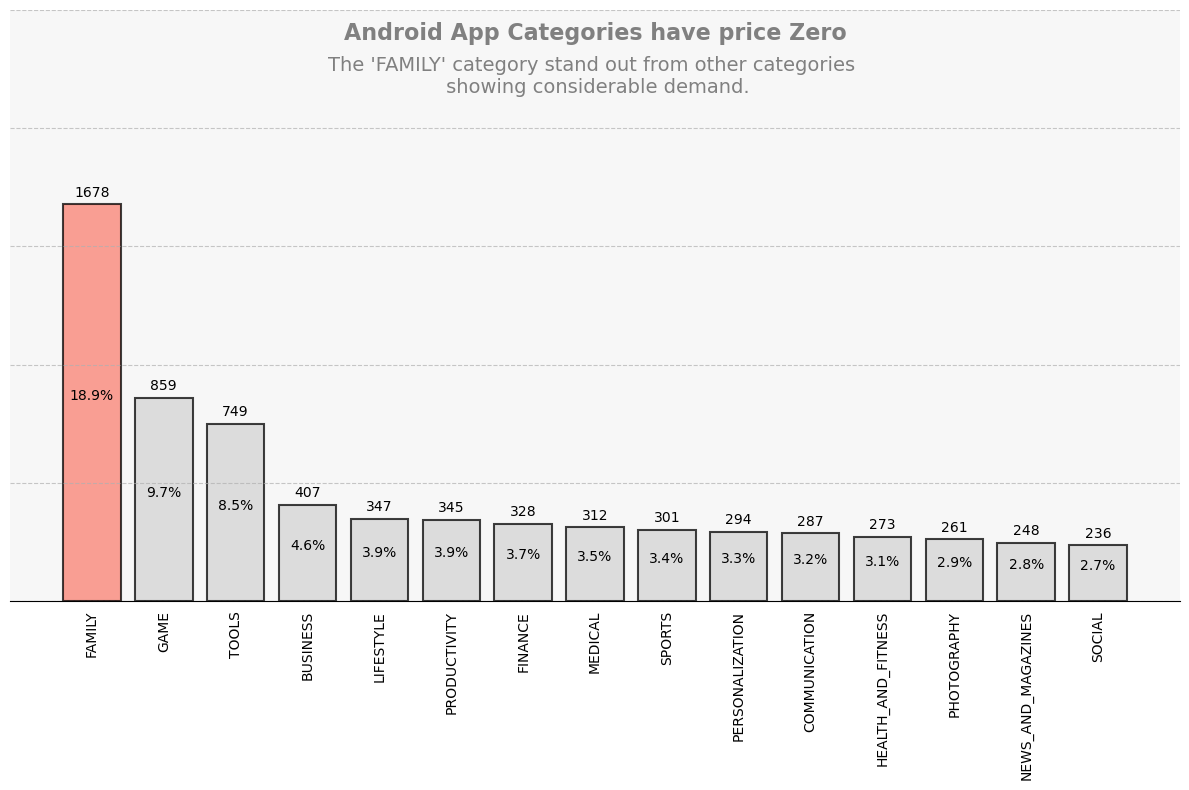

In [67]:
# same as above but I need more info , Make a Bar graph who have price zero in Category and pick only top 15 category

#Data
categories = android_final['Category'].value_counts().index[:15]
count = android_final['Category'].value_counts().values[:15]
percentage = round(android_final['Category'].value_counts(normalize= True)*100,1)[:15]

#Create Stylish bar chart 
plt.figure(figsize =(12,8))
bars = plt.bar(categories, count, color= 'lightgray' ,alpha = 0.75 , edgecolor = 'black' , linewidth = 1.5) #highlight \

#bar so it store in variable in 'bars'
plt.xticks(rotation = 90 , fontsize =10) #x-axis roatate the values
plt.yticks(fontsize=10)

plt.grid(axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.grid(axis = 'x' , linestyle = '' , alpha = 0.7) #not required for dash lines

plt.yticks(range(0, 3000, 500), [],fontsize=12) # Customized tick labels and customized y-ticks range
plt.tick_params(bottom = 0, left = 0)

#highest category
max_count_category = categories[count.argmax()]

#Highlight the Bar and make color
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

#adding label & percentage inside each bar
for bar, perc in zip(bars , percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 ,height + 20, '%d'% int(height) , ha = 'center' ,\
             va = 'bottom' , fontsize = 10) # counts_no. writtten on above bar
    plt.text(bar.get_x() + bar.get_width()/2 ,height / 2 , f'{perc}%', ha = 'center' ,\
             va = 'bottom' , fontsize = 10) #percentage written in bar
    
#Add Background Color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

#Add chart Title inside chart(Heading Line)
plt.text(0.5 , 0.95 , 'Android App Categories have price Zero' , horizontalalignment = 'center' , transform = plt.gca().transAxes , 
         color = 'grey' , fontweight = 'bold' ,fontsize =16)
         
#Add chart Title inside chart(Bottom Line)
plt.text(0.5 , 0.86 , "The 'FAMILY' category stand out from other categories \n showing considerable demand." ,
         horizontalalignment = 'center' , transform = plt.gca().transAxes , 
         color = 'grey' , fontsize = 14)
    
#Remove Spines(Boundries lines remove)
for i in ['top' , 'left' , 'right']:
    plt.gca().spines[i].set_visible(False)
    
#adjust layout to clipping
plt.tight_layout()

plt.show()

In [68]:
categories = android_final['Category'].value_counts().index[:15]

In [69]:
categories

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'LIFESTYLE', 'PRODUCTIVITY',
       'FINANCE', 'MEDICAL', 'SPORTS', 'PERSONALIZATION', 'COMMUNICATION',
       'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'NEWS_AND_MAGAZINES', 'SOCIAL'],
      dtype='object')

In [70]:
count = android_final['Category'].value_counts().values[:15]

In [71]:
categories[count.argmax()]

'FAMILY'

In [72]:
for i in bars:
    print(i)

Rectangle(xy=(-0.4, 0), width=0.8, height=1678, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=859, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=749, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=407, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=347, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=345, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=328, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=312, angle=0)
Rectangle(xy=(7.6, 0), width=0.8, height=301, angle=0)
Rectangle(xy=(8.6, 0), width=0.8, height=294, angle=0)
Rectangle(xy=(9.6, 0), width=0.8, height=287, angle=0)
Rectangle(xy=(10.6, 0), width=0.8, height=273, angle=0)
Rectangle(xy=(11.6, 0), width=0.8, height=261, angle=0)
Rectangle(xy=(12.6, 0), width=0.8, height=248, angle=0)
Rectangle(xy=(13.6, 0), width=0.8, height=236, angle=0)


In [73]:
for i in bars:
    print(i.get_x() + bar.get_width()/2)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0


In [74]:
for i in bars:
    print(i.get_x() + bar.get_width()/2, i.get_height())

0.0 1678
1.0 859
2.0 749
3.0 407
4.0 347
5.0 345
6.0 328
7.0 312
8.0 301
9.0 294
10.0 287
11.0 273
12.0 261
13.0 248
14.0 236


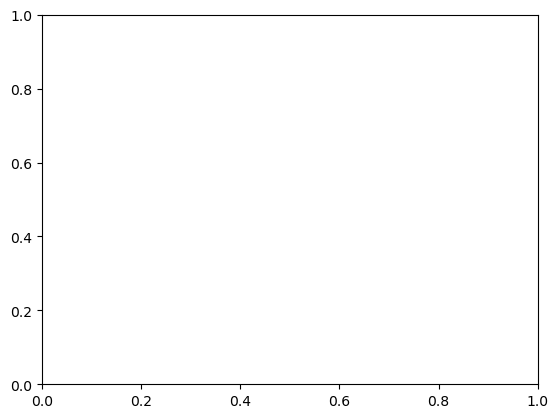

In [75]:
plt.gca().transAxes

In [76]:
android_final[android_final["Category"] == "FAMILY"]

App Category Rating  \
2017                        Jewels Crush- Match 3 Puzzle   FAMILY    4.4   
2018                                    Coloring & Learn   FAMILY    4.4   
2019                                             Mahjong   FAMILY    4.5   
2020   Super ABC! Learning games for kids! Preschool ...   FAMILY    4.6   
2021                                       Toy Pop Cubes   FAMILY    4.5   
...                                                  ...      ...    ...   
10821                                            Poop FR   FAMILY    NaN   
10827                                 Fr Agnel Ambarnath   FAMILY    4.2   
10834                                      FR Calculator   FAMILY    4.0   
10836                                   Sya9a Maroc - FR   FAMILY    4.5   
10837                   Fr. Mike Schmitz Audio Teachings   FAMILY    5.0   

      Reviews  Size    Installs  Type Price Content Rating  \
2017    14774   19M  1,000,000+  Free     0       Everyone   
2018    12753   51M  5,000,000+  Free     0       Everyone   
2019    33983   22M  5,000,000+  Free     0       Everyone   
2020    20267   46M  1,000,000+  Free     0       Everyone   
2021     5761   21M  1,000,000+  Free     0       Everyone   
...       ...   ...         ...   ...   ...            ...   
10821       6  2.5M         50+  Free     0       Everyone   
10827     117   13M      5,000+  Free     0       Everyone   
10834       7  2.6M        500+  Free     0       Everyone   
10836      38   53M      5,000+  Free     0       Everyone   
10837       4  3.6M        100+  Free     0       Everyone   

                       Genres    Last Updated Current Ver   Android Ver  
2017       Casual;Brain Games   July 23, 2018    1.9.3901  4.0.3 and up  
2018   Educational;Creativity   July 17, 2018        1.49  4.0.3 and up  
2019       Puzzle;Brain Games  August 2, 2018   1.24.3181  4.0.3 and up  
2020    Educational;Education   July 16, 2018     1.1.6.7    4.1 and up  
2021       Casual;Brain Games    July 4, 2018    1.8.3181  4.0.3 and up  
...                       ...             ...         ...           ...  
10821           Entertainment    May 29, 2018         1.0  4.0.3 and up  
10827               Education   June 13, 2018      2.0.20  4.0.3 and up  
10834               Education   June 18, 2017       1.0.0    4.1 and up  
10836               Education   July 25, 2017        1.48    4.1 and up  
10837               Education    July 6, 2018         1.0    4.1 and up  

[1678 rows x 13 columns]

### Most Poular Apps by Genre on Google Play

##### For the Google Play market, we actually have data about the number of installs, so we should be able to get a clear picture about genre popularity. Howerver, the install numbers don't seem precise enough--we can see that most values are open-ended (100+, 1000+, 5,000+, etc):

In [77]:
android_final["Installs"].value_counts(normalize = True)*100

1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: Installs, dtype: float64

In [78]:
android_final["Installs_int"] = android_final["Installs"].str.replace(",","").str.replace('+' ,'').astype(int)

C:\Users\Kamran Zaidi\AppData\Local\Temp\ipykernel_14524\830422809.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  android_final["Installs_int"] = android_final["Installs"].str.replace(",","").str.replace('+' ,'').astype(int)
C:\Users\Kamran Zaidi\AppData\Local\Temp\ipykernel_14524\830422809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_final["Installs_int"] = android_final["Installs"].str.replace(",","").str.replace('+' ,'').astype(int)


In [79]:
android_final["Installs_int"].value_counts()

1000000       1395
100000        1024
10000000       932
10000          904
1000           745
100            613
5000000        606
500000         494
50000          423
5000           400
10             314
500            288
50000000       203
100000000      188
50             170
5               70
1               45
500000000       24
1000000000      20
0                5
Name: Installs_int, dtype: int64

In [80]:
android_final["Installs_int"].value_counts().sort_index()

0                5
1               45
5               70
10             314
50             170
100            613
500            288
1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs_int, dtype: int64

In [81]:
install_frq = android_final["Installs_int"].value_counts().sort_index()
install_frq = install_frq[install_frq.index > 500]
install_frq

1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs_int, dtype: int64

In [82]:
install_frq_per = round(android_final["Installs_int"].value_counts(normalize=True)*100,2).sort_index()
install_frq_per = install_frq_per[install_frq_per.index > 500]
install_frq_per

1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: Installs_int, dtype: float64

In [83]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

In [84]:
alphanumeric_units(1000000000)

'1B'

In [85]:
f"{2000/1e3:.2f}K"

'2.00K'

In [86]:
install_frq.index 

Int64Index([      1000,       5000,      10000,      50000,     100000,
                500000,    1000000,    5000000,   10000000,   50000000,
             100000000,  500000000, 1000000000],
           dtype='int64')

In [87]:
install_frq.index = install_frq.index.map(alphanumeric_units)
install_frq

1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: Installs_int, dtype: int64

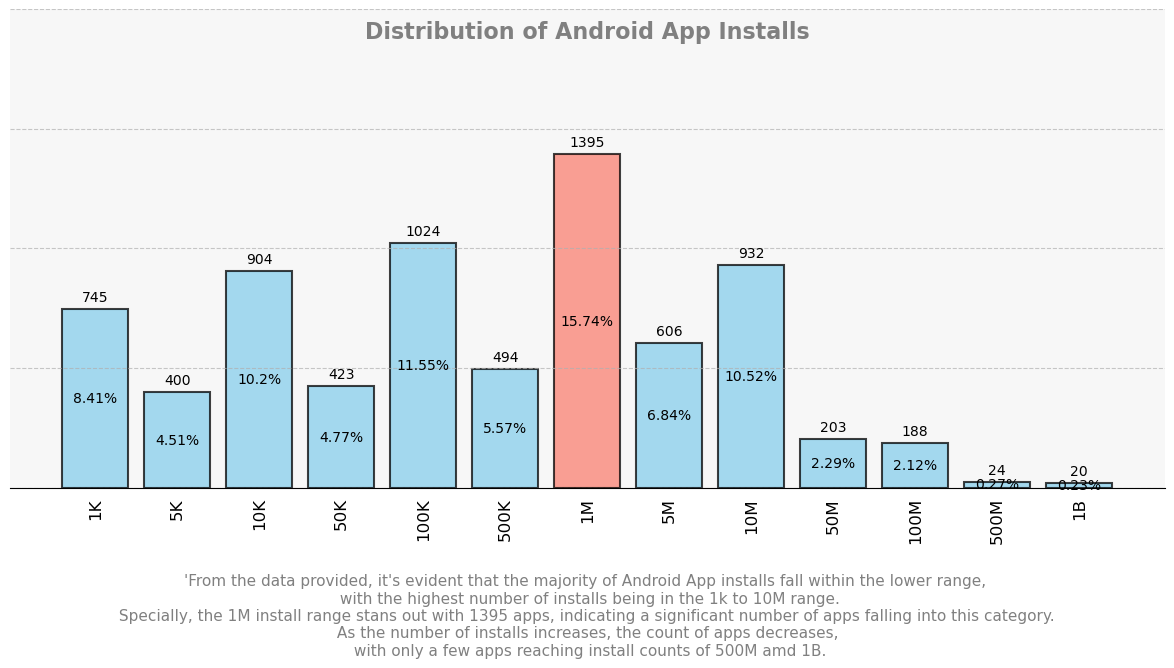

In [88]:
# Data
categories = install_frq.index
counts = install_frq.values
percentage = install_frq_per.values

# Create Stylish bar chart
plt.figure(figsize =(12, 7))
bars = plt.bar(categories , counts , color='skyblue' , alpha= 0.75 , edgecolor = 'black' , linewidth = 1.5) #highlight \
#bar so it store in variable in 'bars'
plt.xticks(rotation = 90 , fontsize =12) #x-axis roatate the values
plt.yticks(fontsize=12)
plt.grid(axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.grid(axis= 'x', linestyle='') # not required for dash lines
plt.xticks(fontsize=12)
plt.yticks(range(0, 2500, 500), [], fontsize=12) #Customized tick labels and customized y-ticks range
plt.tick_params(bottom = 0, left = 0)

#highest category
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

## Adding data labels and percentages inside each bar
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 ,height + 20, '%d'% int(height) , ha ='center' ,va ='bottom' , fontsize=10) 
    plt.text(bar.get_x() + bar.get_width()/2 ,height / 2 , f'{perc}%', ha ='center' , va ='center' , fontsize=10, color='black') 
    
#Add Background Color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

#Add chart Title inside chart(Heading Line)
plt.text(0.5 , 0.94 , 'Distribution of Android App Installs' , horizontalalignment = 'center' , transform = plt.gca().transAxes , 
         color = 'gray' , fontweight = 'bold' ,fontsize =16)
         
#Add chart Title inside chart(Bottom Line)
plt.text(0.5 , -0.35 , "'From the data provided, it's evident that the majority of Android App installs fall within the lower range, \n with the highest number of installs being in the 1k to 10M range.\n Specially, the 1M install range stans out with 1395 apps, indicating a significant number of apps falling into this category. \n As the number of installs increases, the count of apps decreases, \n with only a few apps reaching install counts of 500M amd 1B." ,
         horizontalalignment = 'center' , transform = plt.gca().transAxes , 
         color = 'gray' , fontsize = 11)
    
#Remove Spines(Boundries lines remove)
for i in ['top' , 'left' , 'right']:
    plt.gca().spines[i].set_visible(False)
    
#adjust layout to clipping
plt.tight_layout()

plt.show()


In [89]:
max_count_category = categories[counts.argmax()]
max_count_category

'1M'

In [90]:
count

array([1678,  859,  749,  407,  347,  345,  328,  312,  301,  294,  287,
        273,  261,  248,  236], dtype=int64)

In [91]:
max_count_index = list(categories).index(max_count_category)
max_count_index

6

In [92]:
categories_android = android_final["Category"].unique()
categories_android

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [93]:
pd.pivot_table(android_final, values ='Installs_int', index ='Category', aggfunc='mean')

Installs_int
Category                         
ART_AND_DESIGN       1.986335e+06
AUTO_AND_VEHICLES    6.473178e+05
BEAUTY               5.131519e+05
BOOKS_AND_REFERENCE  8.767812e+06
BUSINESS             1.712290e+06
COMICS               8.176573e+05
COMMUNICATION        3.845612e+07
DATING               8.540288e+05
EDUCATION            1.820673e+06
ENTERTAINMENT        1.164071e+07
EVENTS               2.535422e+05
FAMILY               3.694276e+06
FINANCE              1.387692e+06
FOOD_AND_DRINK       1.924898e+06
GAME                 1.556097e+07
HEALTH_AND_FITNESS   4.188822e+06
HOUSE_AND_HOME       1.331541e+06
LIBRARIES_AND_DEMO   6.385037e+05
LIFESTYLE            1.433676e+06
MAPS_AND_NAVIGATION  4.056942e+06
MEDICAL              1.206165e+05
NEWS_AND_MAGAZINES   9.549178e+06
PARENTING            5.426036e+05
PERSONALIZATION      5.201483e+06
PHOTOGRAPHY          1.780563e+07
PRODUCTIVITY         1.678733e+07
SHOPPING             7.036877e+06
SOCIAL               2.325365e+07
SPORTS               3.638640e+06
TOOLS                1.068230e+07
TRAVEL_AND_LOCAL     1.398408e+07
VIDEO_PLAYERS        2.472787e+07
WEATHER              5.074486e+06

In [94]:
# Display DataFrame without scientific notataion
pd.options.display.float_format = '{:.0f}'.format

In [95]:
categories_installs = pd.pivot_table(android_final, values ='Installs_int', index ='Category', aggfunc='mean')
categories_installs = categories_installs.sort_values(by="Installs_int", ascending=False)
categories_installs = categories_installs["Installs_int"]
categories_installs

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [96]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.1f}'

In [97]:
categories_installs_unit = categories_installs.map(alphanumeric_units)
categories_installs_unit

Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

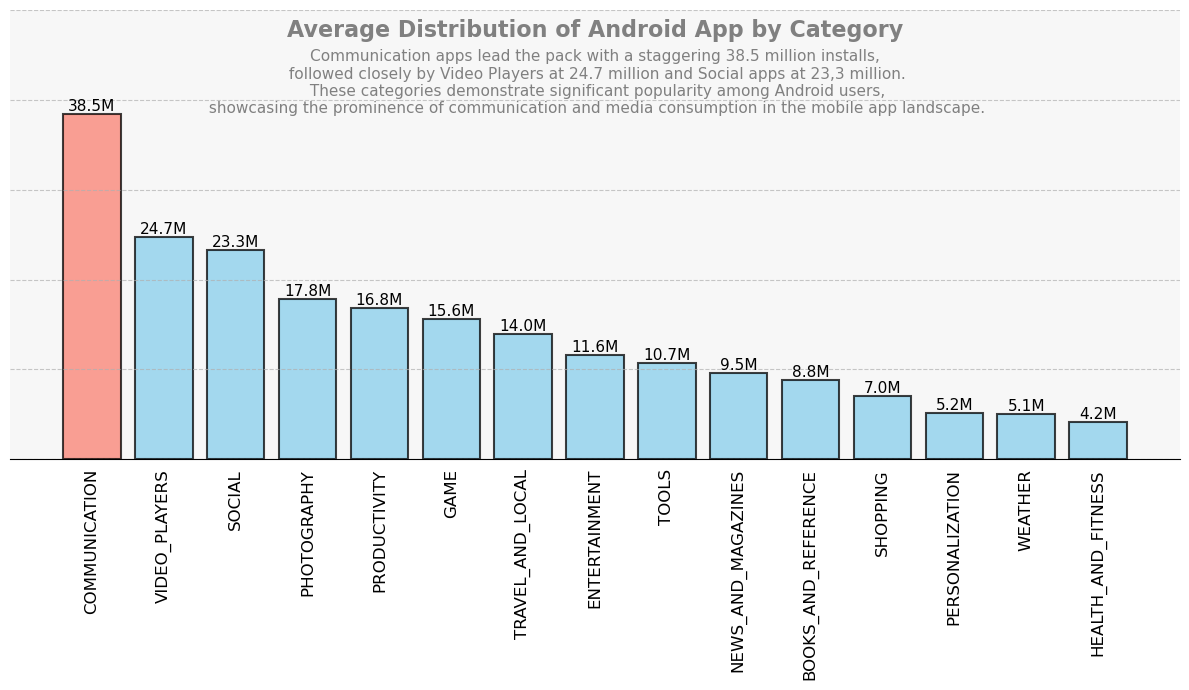

In [98]:
# Data
categories = categories_installs.index[:15]
counts = categories_installs.values[:15]


# Create Stylish bar chart
plt.figure(figsize =(12, 7))
bars = plt.bar(categories , counts , color='skyblue' , alpha= 0.75 , edgecolor = 'black' , linewidth = 1.5)
plt.xticks(rotation = 90 , fontsize =12) 
plt.yticks(fontsize=12)
plt.grid(axis = 'y' , linestyle = '--' , alpha = 0.7)
plt.grid(axis= 'x', linestyle='') # not required for dash lines
plt.xticks(fontsize=12)
plt.yticks(range(0, 60000000, 10000000), [],fontsize=12) #Customized tick labels and customized y-ticks range
plt.tick_params(bottom = 0, left = 0)

#highest category
max_count_category = categories[count.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color('salmon')
bars[max_count_index].set_edgecolor('black')

## Adding data labels and percentages inside each bar
for bar, units in zip(bars, categories_installs_unit.values):
    height = bar.get_height()    
    plt.text(bar.get_x() + bar.get_width()/2, height + 25 , units, ha ='center' , va ='bottom' , fontsize=11) 
    
#Add Background Color
ax = plt.gca()
ax.set_facecolor("#f7f7f7")

#Add chart Title inside chart(Heading Line)
plt.text(0.5 , 0.94 , 'Average Distribution of Android App by Category' , horizontalalignment = 'center' , transform = plt.gca().transAxes , 
         color = 'gray' , fontweight = 'bold' ,fontsize =16)
         
#Add chart Title inside chart(Bottom Line)
plt.text(0.5, 0.77 , '''Communication apps lead the pack with a staggering 38.5 million installs,\n followed closely by Video Players at 24.7 million and Social apps at 23,3 million.\n These categories demonstrate significant popularity among Android users,\n showcasing the prominence of communication and media consumption in the mobile app landscape.''',
         horizontalalignment = 'center', fontsize = 11, transform = plt.gca().transAxes, color = 'gray')
    
#Remove Spines(Boundries lines remove)
for i in ['top' , 'left' , 'right']:
    plt.gca().spines[i].set_visible(False)
    
#adjust layout to clipping
plt.tight_layout()

plt.show()


In [99]:
category_group = android_final.groupby("Category")

In [100]:
COMMUNICATION = category_group.get_group("COMMUNICATION").sort_values(by="Installs_int", ascending = False)
COMMUNICATION.head()

App       Category Rating   Reviews  \
336                        WhatsApp Messenger  COMMUNICATION      4  69119316   
382  Messenger – Text and Video Chat for Free  COMMUNICATION      4  56646578   
464                                  Hangouts  COMMUNICATION      4   3419513   
411              Google Chrome: Fast & Secure  COMMUNICATION      4   9643041   
391             Skype - free IM & video calls  COMMUNICATION      4  10484169   

                   Size        Installs  Type Price Content Rating  \
336  Varies with device  1,000,000,000+  Free     0       Everyone   
382  Varies with device  1,000,000,000+  Free     0       Everyone   
464  Varies with device  1,000,000,000+  Free     0       Everyone   
411  Varies with device  1,000,000,000+  Free     0       Everyone   
391  Varies with device  1,000,000,000+  Free     0       Everyone   

            Genres    Last Updated         Current Ver         Android Ver  \
336  Communication  August 3, 2018  Varies with device  Varies with device   
382  Communication  August 1, 2018  Varies with device  Varies with device   
464  Communication   July 21, 2018  Varies with device  Varies with device   
411  Communication  August 1, 2018  Varies with device  Varies with device   
391  Communication  August 3, 2018  Varies with device  Varies with device   

     Installs_int  
336    1000000000  
382    1000000000  
464    1000000000  
411    1000000000  
391    1000000000

In [101]:
def alphanumeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.1f}'

In [102]:
categories_installs.index[:15]

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [103]:
df = COMMUNICATION[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

App  Installs_int  \
336                                  WhatsApp Messenger    1000000000   
382            Messenger – Text and Video Chat for Free    1000000000   
464                                            Hangouts    1000000000   
411                        Google Chrome: Fast & Secure    1000000000   
391                       Skype - free IM & video calls    1000000000   
451                                               Gmail    1000000000   
403                         LINE: Free Calls & Messages     500000000   
4676                                    Viber Messenger     500000000   
420         UC Browser - Fast Download Private & Secure     500000000   
371               Google Duo - High Quality Video Calls     500000000   
383                       imo free video calls and chat     500000000   
393                                                 Who     100000000   
4633        UC Browser Mini -Tiny Fast Private & Secure     100000000   
4602  Truecaller: Caller ID, SMS spam blocking & Dialer     100000000   
4592                                           Telegram     100000000   

     Installs_int_unit  
336                 1B  
382                 1B  
464                 1B  
411                 1B  
391                 1B  
451                 1B  
403               500M  
4676              500M  
420               500M  
371               500M  
383               500M  
393               100M  
4633              100M  
4602              100M  
4592              100M

In [104]:
df = category_group.get_group("VIDEO_PLAYERS").sort_values(by="Installs_int", ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

App  Installs_int  \
3665                                             YouTube    1000000000   
3687                             Google Play Movies & TV    1000000000   
3711                                           MX Player     500000000   
3675                                     VLC for Android     100000000   
4688              VivaVideo - Video Editor & Photo Movie     100000000   
4032                                            Dubsmash     100000000   
10647                                  Motorola FM Radio     100000000   
4696   VideoShow-Video Editor, Video Maker, Beauty Ca...     100000000   
3672                                    Motorola Gallery     100000000   
3691                               Samsung Video Library      50000000   
4038   DU Recorder – Screen Recorder, Video Editor, Live      50000000   
3693                LIKE – Magic Video Maker & Community      50000000   
3686                                          Vigo Video      50000000   
4049                       KineMaster – Pro Video Editor      50000000   
5612                                           Ringdroid      50000000   

      Installs_int_unit  
3665                 1B  
3687                 1B  
3711               500M  
3675               100M  
4688               100M  
4032               100M  
10647              100M  
4696               100M  
3672               100M  
3691                50M  
4038                50M  
3693                50M  
3686                50M  
4049                50M  
5612                50M

In [105]:
df = category_group.get_group("SOCIAL").sort_values(by="Installs_int", ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

App  Installs_int Installs_int_unit
2544                                Facebook    1000000000                1B
2554                                 Google+    1000000000                1B
2604                               Instagram    1000000000                1B
2610                                Snapchat     500000000              500M
2546                           Facebook Lite     500000000              500M
3945          Tik Tok - including musical.ly     100000000              100M
2592            Tango - Live Video Broadcast     100000000              100M
6373                                      VK     100000000              100M
2552                               Pinterest     100000000              100M
3951                 BIGO LIVE - Live Stream     100000000              100M
2621                                LinkedIn     100000000              100M
2548                                  Tumblr     100000000              100M
2588          Badoo - Free Chat & Dating App     100000000              100M
2636                 Zello PTT Walkie Talkie      50000000               50M
2595  ooVoo Video Calls, Messaging & Stories      50000000               50M

In [106]:
df = category_group.get_group("PRODUCTIVITY").sort_values(by="Installs_int", ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

App  Installs_int Installs_int_unit
3523                    Google Drive    1000000000                1B
3450                  Microsoft Word     500000000              500M
3562                 Google Calendar     500000000              500M
3574                     Cloud Print     500000000              500M
3473                         Dropbox     500000000              500M
3524            Adobe Acrobat Reader     100000000              100M
3489                   Samsung Notes     100000000              100M
3477                     Google Docs     100000000              100M
3493               SwiftKey Keyboard     100000000              100M
7808  CamScanner - Phone PDF Creator     100000000              100M
3469   ES File Explorer File Manager     100000000              100M
3486            Microsoft PowerPoint     100000000              100M
3467                     Google Keep     100000000              100M
3465               Microsoft OneNote     100000000              100M
3526                   Google Sheets     100000000              100M

In [107]:
df = category_group.get_group("PHOTOGRAPHY").sort_values(by="Installs_int", ascending = False)
df = df[["App","Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanumeric_units)
df

App  Installs_int  \
2884                                      Google Photos    1000000000   
4574     S Photo Editor - Collage Maker , Photo Collage     100000000   
2949  Camera360: Selfie Photo Editor with Funny Sticker     100000000   
2908                                            Retrica     100000000   
8307                         LINE Camera - Photo editor     100000000   
2921                                   Photo Editor Pro     100000000   
2847  Sweet Selfie - selfie camera, beauty cam, phot...     100000000   
2937     BeautyPlus - Easy Photo Editor & Selfie Camera     100000000   
2938   PicsArt Photo Studio: Collage Maker & Pic Editor     100000000   
5057                                          AR effect     100000000   
2833             YouCam Makeup - Magic Selfie Makeovers     100000000   
2942    Z Camera - Photo Editor, Beauty Selfie, Collage     100000000   
2943  PhotoGrid: Video & Pic Collage Maker, Photo Ed...     100000000   
2944  Candy Camera - selfie, beauty camera, photo ed...     100000000   
2945               YouCam Perfect - Selfie Photo Editor     100000000   

     Installs_int_unit  
2884                1B  
4574              100M  
2949              100M  
2908              100M  
8307              100M  
2921              100M  
2847              100M  
2937              100M  
2938              100M  
5057              100M  
2833              100M  
2942              100M  
2943              100M  
2944              100M  
2945              100M

## Conclusion


The analysis of the photography category reveals a notebale trend in the popularity of photo editing and college-making applications, with several apps gamering over 100 million installs. This indicates a strong demand for photo-related functionalities among users.

Given this observation, there appears to be significant potential for the development of a photo generation application in 2024. Such an app, offering prompt and free generation of pictures and photos, could capitalize on the existing user interest in photography apps. By providing innovative features, each usability, and high-quality output, this application could stand out in the competitive market and attract a large user base.

Considering the success of existing photography apps and the eveloving prefrences of users, investing in the development of a photo generation app seems promising for tapping into this lucarative market segment in 2024.
